# Load dataset

In [1]:
import gdown
!gdown 1rhTSl9xVdOw9f43gxjLetYszwKWWa3Fy

Downloading...
From: https://drive.google.com/uc?id=1rhTSl9xVdOw9f43gxjLetYszwKWWa3Fy
To: /content/datapreprocessing.xlsx
100% 398k/398k [00:00<00:00, 100MB/s]


In [2]:
import pandas as pd
data = pd.read_excel('datapreprocessing.xlsx')
data.columns

Index(['Unnamed: 0', 'mssv', 'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa',
       'hedt', 'khoahoc', 'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1',
       'diem_hk2', 'diem_hk3', 'diem_hk4', 'diem_hk5', 'diem_hk6', 'diem_hk7',
       'diem_hk8', 'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5',
       'drl_hk6', 'drl_hk7', 'loaixn', 'tongdiem_av', 'trangthai_av',
       'sl_giam', 'xlhv', 'dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy',
       'label'],
      dtype='object')

In [3]:
# data = data.drop(columns = ["Unnamed: 0", "mssv"])
len(data.columns)

36

# Split Train Test Data


In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
print('Train: ', X_train.shape)
print('Test: ', X_test.shape)
X_train.columns

Train:  (1452, 35)
Test:  (716, 35)


Index(['Unnamed: 0', 'mssv', 'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa',
       'hedt', 'khoahoc', 'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1',
       'diem_hk2', 'diem_hk3', 'diem_hk4', 'diem_hk5', 'diem_hk6', 'diem_hk7',
       'diem_hk8', 'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5',
       'drl_hk6', 'drl_hk7', 'loaixn', 'tongdiem_av', 'trangthai_av',
       'sl_giam', 'xlhv', 'dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy'],
      dtype='object')

#Model

In [9]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import joblib
import pandas as pd
import seaborn as sn
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# encoder and normalize data
def norm(train, test):
  pd.options.mode.chained_assignment = None 
  # Encode categorical features
  label_encoder = LabelEncoder()
  X_data_list = [train, test]
  for X_data in X_data_list:
    for column in X_data.columns:
        if X_data[column].dtype == 'object' or X_data[column].dtype == 'string':
            X_data[column] = label_encoder.fit_transform(X_data[column])

  # Standardize features
  scaler = StandardScaler()
  train = scaler.fit_transform(train)
  test = scaler.transform(test)

  return train, test

In [42]:
# list of model
model_list = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
  ]

def train_and_test(x_train, x_test, y_train, y_test, models):
  # create dataframe with eval
  eval = pd.DataFrame(columns = ['Model','Accuracy','Precision','Recall','F1-score'])
  # Train and evaluate models
  for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute performance metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # print result
    print(f"{type(model).__name__}")
    print(f"├── Accuracy: {acc:.5f}")
    print(f"├── Precision: {prec:.5f}")
    print(f"├── Recall: {recall:.5f}")
    print(f"└── F1 Score: {f1:.5f}")
    print(f"├── Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    eval.loc[len(eval.index)] = [type(model).__name__,acc,prec,recall,f1] 
  return eval

In [12]:
# plot result as bar
def draw_chart(df):
  plt.rcParams["figure.figsize"] = [14, 6]
  plt.rcParams["figure.autolayout"] = True
  colors = plt.cm.Set2(range(len(df)))
  ax = df.plot.bar(x = df.columns[0], y = ['Accuracy', 'Precision', 'Recall', 'F1-score'], rot=0, color = colors)
  # for p in ax.patches:
  #       ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
  plt.legend(bbox_to_anchor=(1, 1))
  plt.title('Performance Metrics')
  plt.show()

# Chia dataset thành các tập data nhỏ theo từng học kỳ

## - Nhóm 1: sinh viên mới vào trường
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2', 'dien_tt', 'mamh'
```

<ipython-input-13-9fddc5ae0b40>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


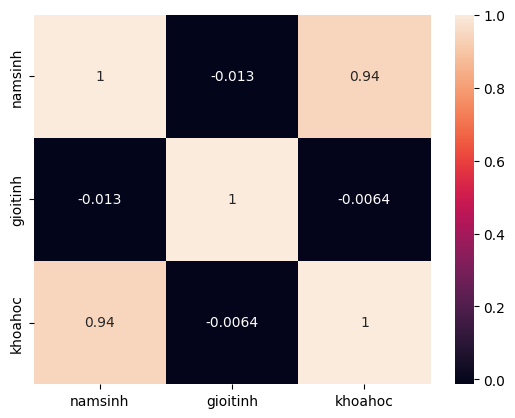

In [13]:
# lấy các cột phù hợp
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2', 'dien_tt', 'mamh']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [14]:
X_train_1 = X_train[cols]
X_test_1 = X_test[cols]
# encoder
X_train_1, X_test_1 = norm(X_train_1, X_test_1)
# train and test
result_1 = train_and_test(X_train_1, X_test_1, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.90223
├── Precision: 0.90854
├── Recall: 0.98350
└── F1 Score: 0.94453
├── Confusion matrix:
[[ 50  60]
 [ 10 596]]
DecisionTreeClassifier
├── Accuracy: 0.84777
├── Precision: 0.92047
├── Recall: 0.89769
└── F1 Score: 0.90894
├── Confusion matrix:
[[ 63  47]
 [ 62 544]]
RandomForestClassifier
├── Accuracy: 0.90642
├── Precision: 0.91525
├── Recall: 0.98020
└── F1 Score: 0.94661
├── Confusion matrix:
[[ 55  55]
 [ 12 594]]
SVC
├── Accuracy: 0.90642
├── Precision: 0.90405
├── Recall: 0.99505
└── F1 Score: 0.94737
├── Confusion matrix:
[[ 46  64]
 [  3 603]]
KNeighborsClassifier
├── Accuracy: 0.89525
├── Precision: 0.89925
├── Recall: 0.98680
└── F1 Score: 0.94099
├── Confusion matrix:
[[ 43  67]
 [  8 598]]
GaussianNB
├── Accuracy: 0.86453
├── Precision: 0.92066
├── Recall: 0.91914
└── F1 Score: 0.91990
├── Confusion matrix:
[[ 62  48]
 [ 49 557]]


                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.902235   0.908537  0.983498  0.944532
1  DecisionTreeClassifier  0.847765   0.920474  0.897690  0.908939
2  RandomForestClassifier  0.906425   0.915254  0.980198  0.946614
3                     SVC  0.906425   0.904048  0.995050  0.947368
4    KNeighborsClassifier  0.895251   0.899248  0.986799  0.940991
5              GaussianNB  0.864525   0.920661  0.919142  0.919901


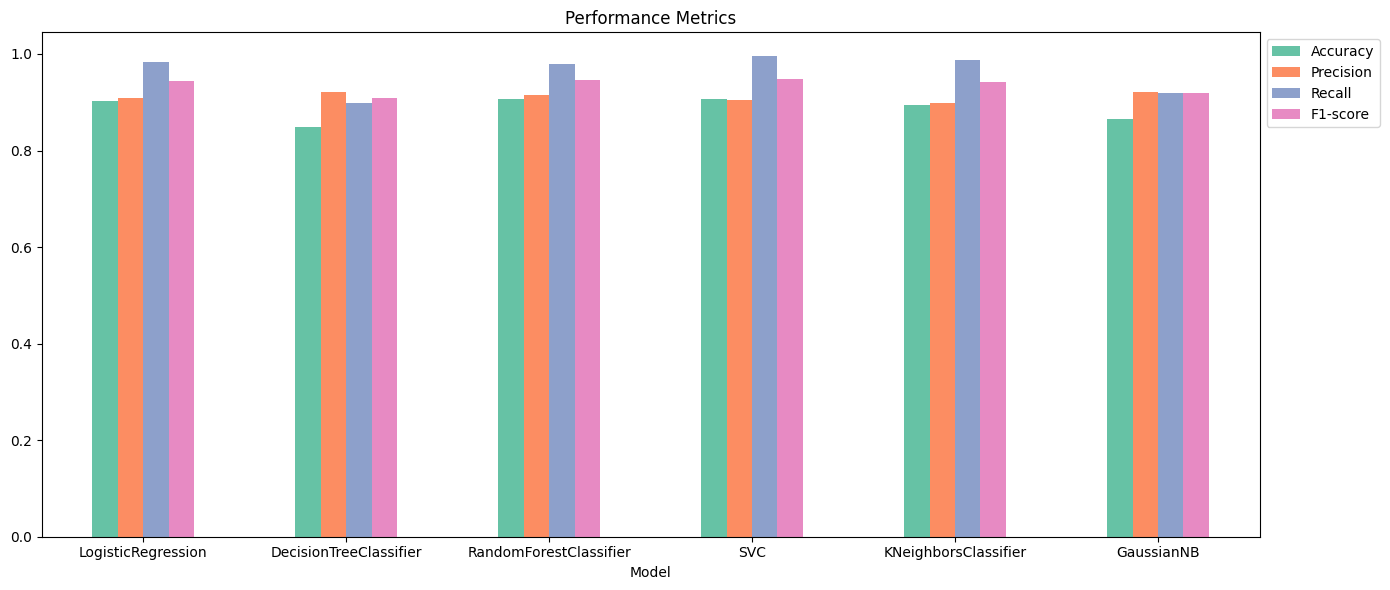

In [15]:
print(result_1)
draw_chart(result_1)

## - Nhóm 2: sinh viên có kq hk1
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1'
```

<ipython-input-16-7c6aa669cd3c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


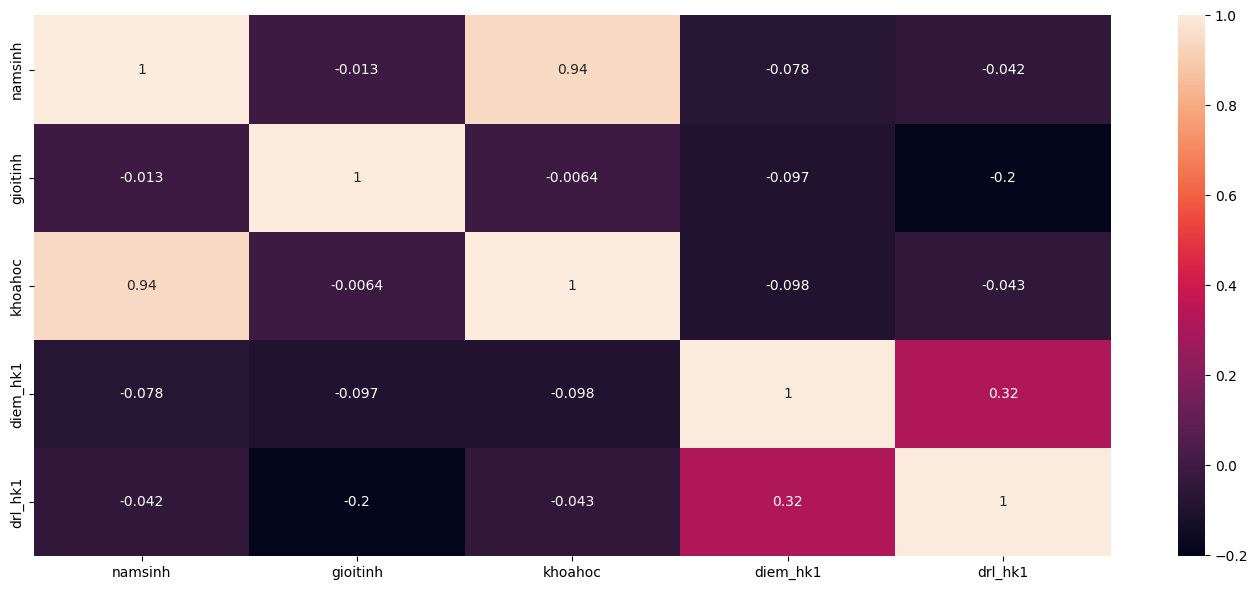

In [16]:
# lấy các cột phù hợp
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [17]:
X_train_2 = X_train[cols]
X_test_2 = X_test[cols]
# encoder
X_train_2, X_test_2 = norm(X_train_2, X_test_2)
# train and test
result_2 = train_and_test(X_train_2, X_test_2, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.92458
├── Precision: 0.92857
├── Recall: 0.98680
└── F1 Score: 0.95680
├── Confusion matrix:
[[ 64  46]
 [  8 598]]
DecisionTreeClassifier
├── Accuracy: 0.88547
├── Precision: 0.92951
├── Recall: 0.93564
└── F1 Score: 0.93257
├── Confusion matrix:
[[ 67  43]
 [ 39 567]]
RandomForestClassifier
├── Accuracy: 0.90922
├── Precision: 0.92068
├── Recall: 0.97690
└── F1 Score: 0.94796
├── Confusion matrix:
[[ 59  51]
 [ 14 592]]
SVC
├── Accuracy: 0.91760
├── Precision: 0.91629
├── Recall: 0.99340
└── F1 Score: 0.95329
├── Confusion matrix:
[[ 55  55]
 [  4 602]]
KNeighborsClassifier
├── Accuracy: 0.90363
├── Precision: 0.90992
├── Recall: 0.98350
└── F1 Score: 0.94528
├── Confusion matrix:
[[ 51  59]
 [ 10 596]]
GaussianNB
├── Accuracy: 0.87570
├── Precision: 0.92727
├── Recall: 0.92574
└── F1 Score: 0.92651
├── Confusion matrix:
[[ 66  44]
 [ 45 561]]


                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.924581   0.928571  0.986799  0.956800
1  DecisionTreeClassifier  0.885475   0.929508  0.935644  0.932566
2  RandomForestClassifier  0.909218   0.920684  0.976898  0.947958
3                     SVC  0.917598   0.916286  0.993399  0.953286
4    KNeighborsClassifier  0.903631   0.909924  0.983498  0.945282
5              GaussianNB  0.875698   0.927273  0.925743  0.926507


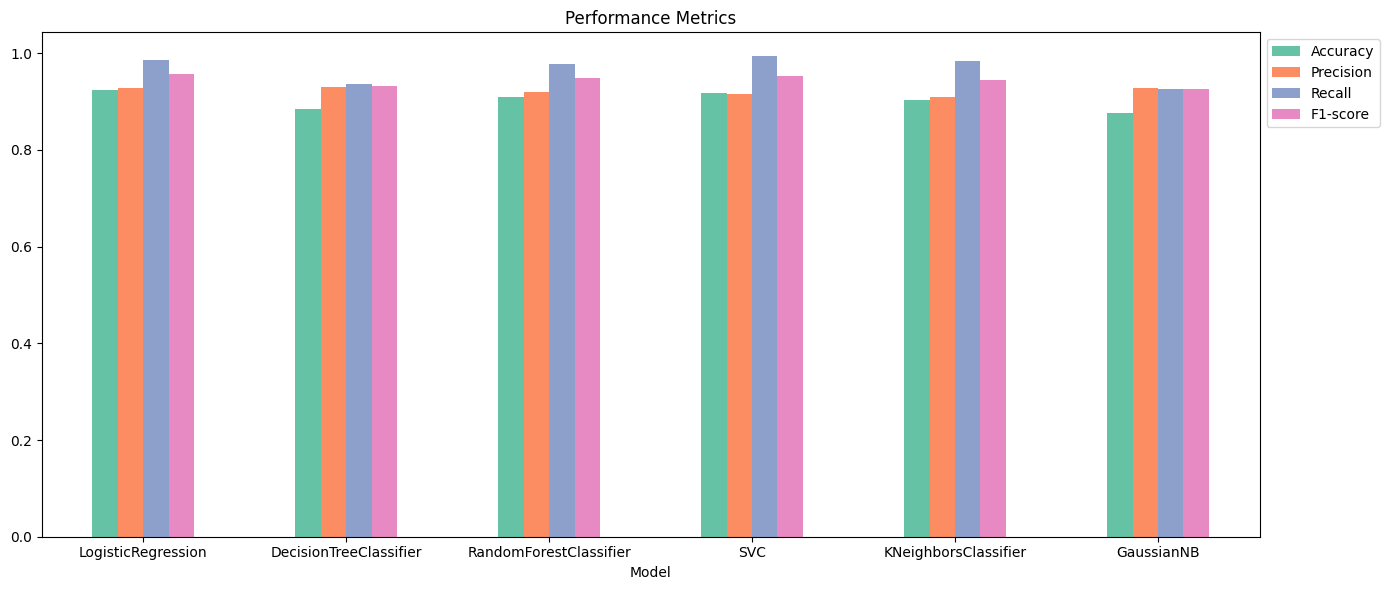

In [18]:
print(result_2)
draw_chart(result_2)

## - Nhóm 3: sinh viên có kq hk2
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 'drl_hk2'
```

<ipython-input-19-4d309a8c14d1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


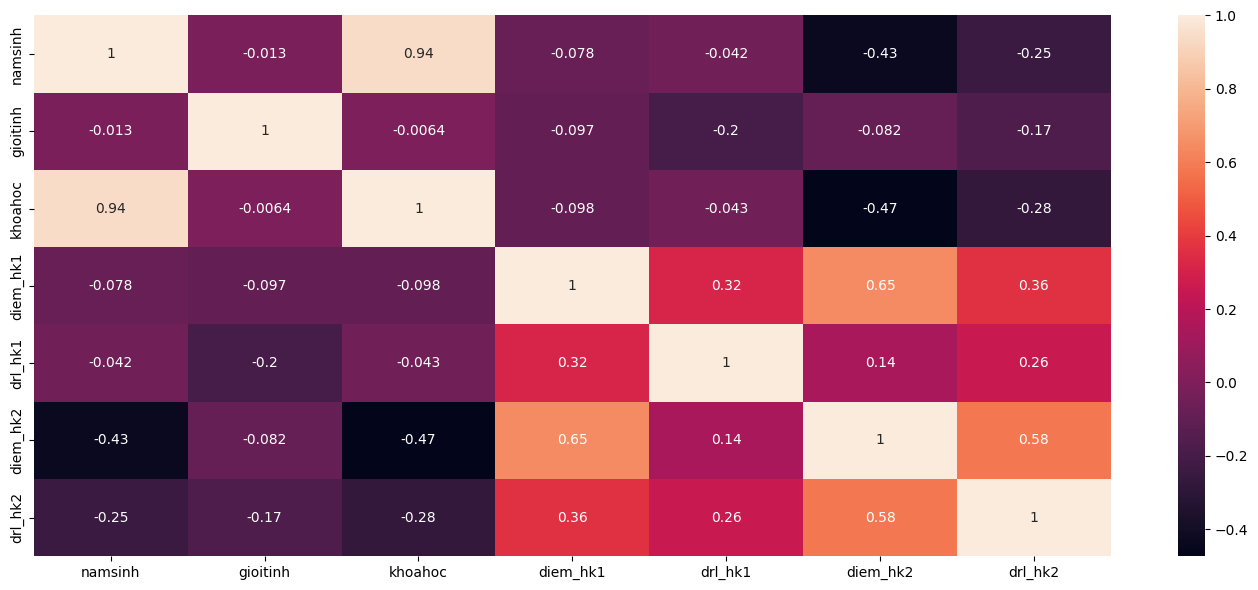

In [19]:
# lấy các cột phù hợp
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 'drl_hk2']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [20]:
X_train_3 = X_train[cols]
X_test_3 = X_test[cols]
# encoder
X_train_3, X_test_3 = norm(X_train_3, X_test_3)
# train and test
result_3 = train_and_test(X_train_3, X_test_3, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.93156
├── Precision: 0.93858
├── Recall: 0.98350
└── F1 Score: 0.96052
├── Confusion matrix:
[[ 71  39]
 [ 10 596]]
DecisionTreeClassifier
├── Accuracy: 0.89106
├── Precision: 0.93854
├── Recall: 0.93234
└── F1 Score: 0.93543
├── Confusion matrix:
[[ 73  37]
 [ 41 565]]
RandomForestClassifier
├── Accuracy: 0.93017
├── Precision: 0.93711
├── Recall: 0.98350
└── F1 Score: 0.95974
├── Confusion matrix:
[[ 70  40]
 [ 10 596]]
SVC
├── Accuracy: 0.93156
├── Precision: 0.92912
├── Recall: 0.99505
└── F1 Score: 0.96096
├── Confusion matrix:
[[ 64  46]
 [  3 603]]
KNeighborsClassifier
├── Accuracy: 0.91620
├── Precision: 0.91489
├── Recall: 0.99340
└── F1 Score: 0.95253
├── Confusion matrix:
[[ 54  56]
 [  4 602]]
GaussianNB
├── Accuracy: 0.89525
├── Precision: 0.93884
├── Recall: 0.93729
└── F1 Score: 0.93807
├── Confusion matrix:
[[ 73  37]
 [ 38 568]]


                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.931564   0.938583  0.983498  0.960516
1  DecisionTreeClassifier  0.891061   0.938538  0.932343  0.935430
2  RandomForestClassifier  0.930168   0.937107  0.983498  0.959742
3                     SVC  0.931564   0.929122  0.995050  0.960956
4    KNeighborsClassifier  0.916201   0.914894  0.993399  0.952532
5              GaussianNB  0.895251   0.938843  0.937294  0.938068


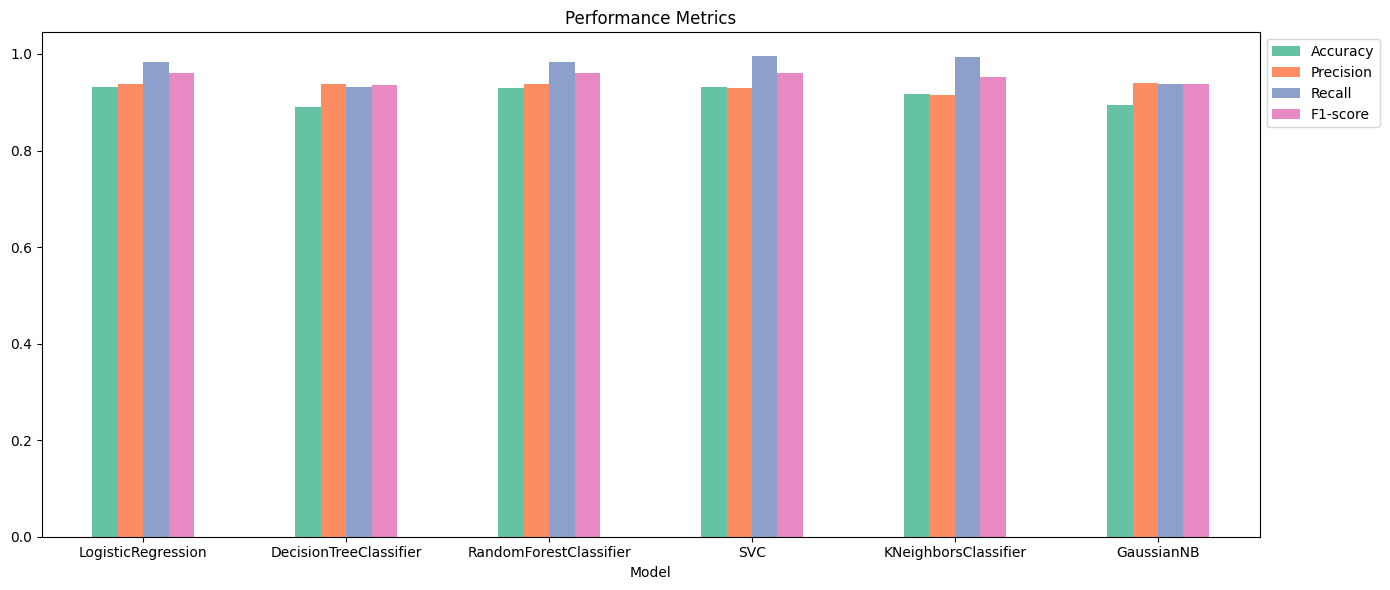

In [21]:
print(result_3)
draw_chart(result_3)

## - Nhóm 4: sinh viên có kq hk3
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3'
```

<ipython-input-22-dd244b895367>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


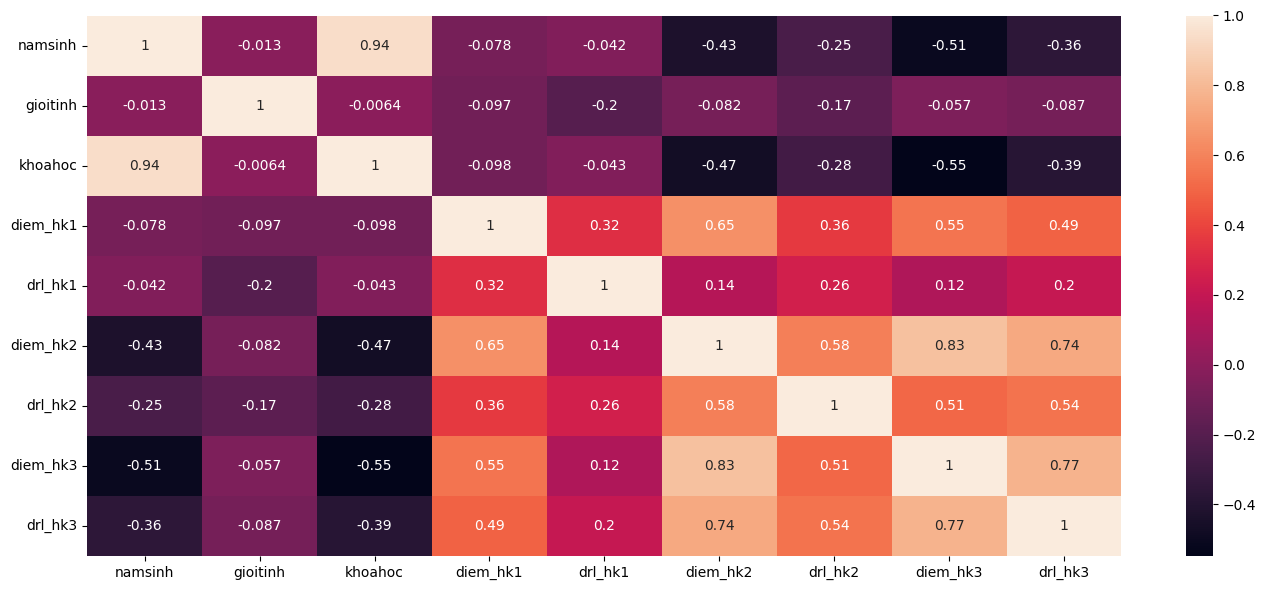

In [22]:
# lấy các cột phù hợp
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [23]:
X_train_4 = X_train[cols]
X_test_4 = X_test[cols]
# encoder
X_train_4, X_test_4 = norm(X_train_4, X_test_4)
# train and test
result_4 = train_and_test(X_train_4, X_test_4, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.95251
├── Precision: 0.96129
├── Recall: 0.98350
└── F1 Score: 0.97227
├── Confusion matrix:
[[ 86  24]
 [ 10 596]]
DecisionTreeClassifier
├── Accuracy: 0.92039
├── Precision: 0.95372
├── Recall: 0.95215
└── F1 Score: 0.95293
├── Confusion matrix:
[[ 82  28]
 [ 29 577]]
RandomForestClassifier
├── Accuracy: 0.95251
├── Precision: 0.95687
├── Recall: 0.98845
└── F1 Score: 0.97240
├── Confusion matrix:
[[ 83  27]
 [  7 599]]
SVC
├── Accuracy: 0.94553
├── Precision: 0.94646
├── Recall: 0.99175
└── F1 Score: 0.96857
├── Confusion matrix:
[[ 76  34]
 [  5 601]]
KNeighborsClassifier
├── Accuracy: 0.93575
├── Precision: 0.93344
├── Recall: 0.99505
└── F1 Score: 0.96326
├── Confusion matrix:
[[ 67  43]
 [  3 603]]
GaussianNB
├── Accuracy: 0.91480
├── Precision: 0.95341
├── Recall: 0.94554
└── F1 Score: 0.94946
├── Confusion matrix:
[[ 82  28]
 [ 33 573]]


                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.952514   0.961290  0.983498  0.972268
1  DecisionTreeClassifier  0.920391   0.953719  0.952145  0.952931
2  RandomForestClassifier  0.952514   0.956869  0.988449  0.972403
3                     SVC  0.945531   0.946457  0.991749  0.968574
4    KNeighborsClassifier  0.935754   0.933437  0.995050  0.963259
5              GaussianNB  0.914804   0.953411  0.945545  0.949461


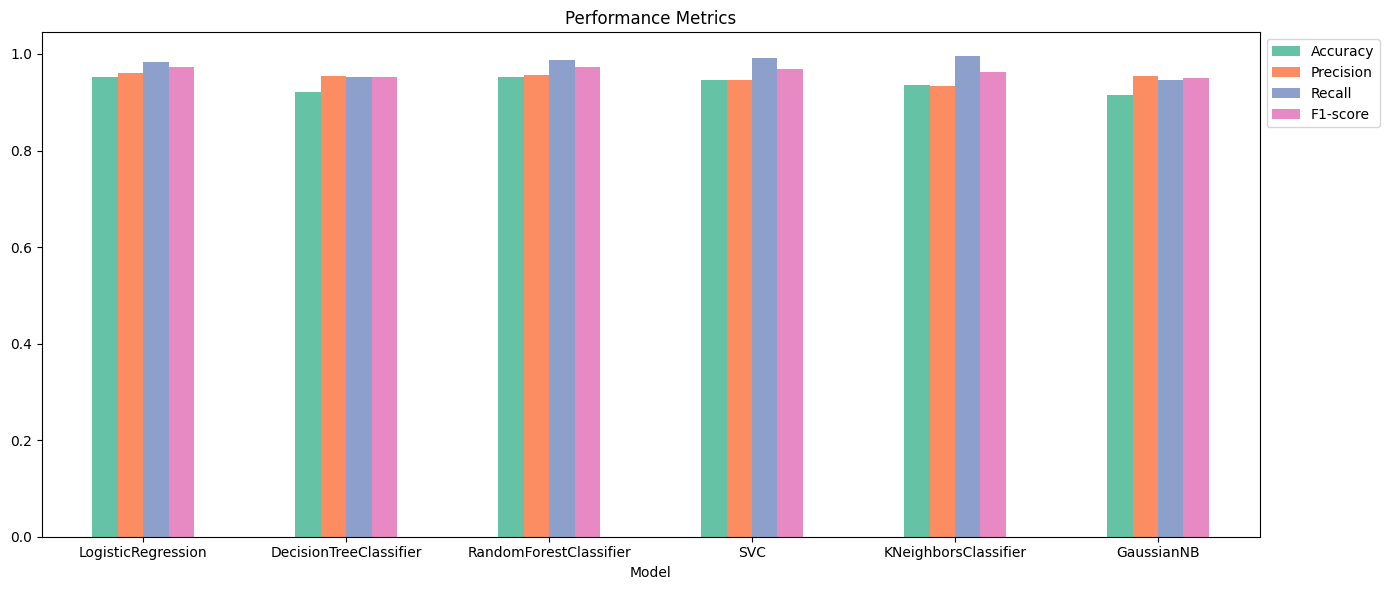

In [24]:
print(result_4)
draw_chart(result_4)

## - Nhóm 5: sinh viên có kq hk4
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4'
```

<ipython-input-25-276cf2735b09>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


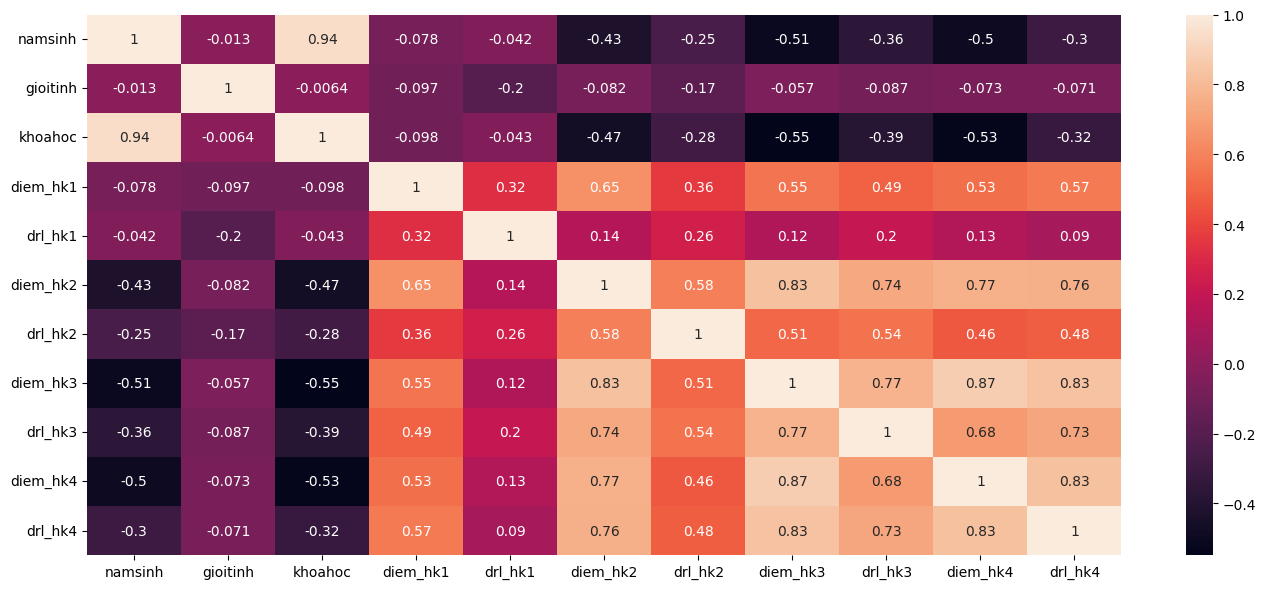

In [25]:
# lấy các cột phù hợp
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [26]:
X_train_5 = X_train[cols]
X_test_5 = X_test[cols]
# encoder
X_train_5, X_test_5 = norm(X_train_5, X_test_5)
# train and test
result_5 = train_and_test(X_train_5, X_test_5, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.97067
├── Precision: 0.97561
├── Recall: 0.99010
└── F1 Score: 0.98280
├── Confusion matrix:
[[ 95  15]
 [  6 600]]
DecisionTreeClassifier
├── Accuracy: 0.94693
├── Precision: 0.96865
├── Recall: 0.96865
└── F1 Score: 0.96865
├── Confusion matrix:
[[ 91  19]
 [ 19 587]]
RandomForestClassifier
├── Accuracy: 0.97346
├── Precision: 0.97262
├── Recall: 0.99670
└── F1 Score: 0.98452
├── Confusion matrix:
[[ 93  17]
 [  2 604]]
SVC
├── Accuracy: 0.96927
├── Precision: 0.97097
├── Recall: 0.99340
└── F1 Score: 0.98206
├── Confusion matrix:
[[ 92  18]
 [  4 602]]
KNeighborsClassifier
├── Accuracy: 0.95112
├── Precision: 0.94819
├── Recall: 0.99670
└── F1 Score: 0.97184
├── Confusion matrix:
[[ 77  33]
 [  2 604]]
GaussianNB
├── Accuracy: 0.95251
├── Precision: 0.97195
├── Recall: 0.97195
└── F1 Score: 0.97195
├── Confusion matrix:
[[ 93  17]
 [ 17 589]]


                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.970670   0.975610  0.990099  0.982801
1  DecisionTreeClassifier  0.946927   0.968647  0.968647  0.968647
2  RandomForestClassifier  0.973464   0.972625  0.996700  0.984515
3                     SVC  0.969274   0.970968  0.993399  0.982055
4    KNeighborsClassifier  0.951117   0.948195  0.996700  0.971842
5              GaussianNB  0.952514   0.971947  0.971947  0.971947


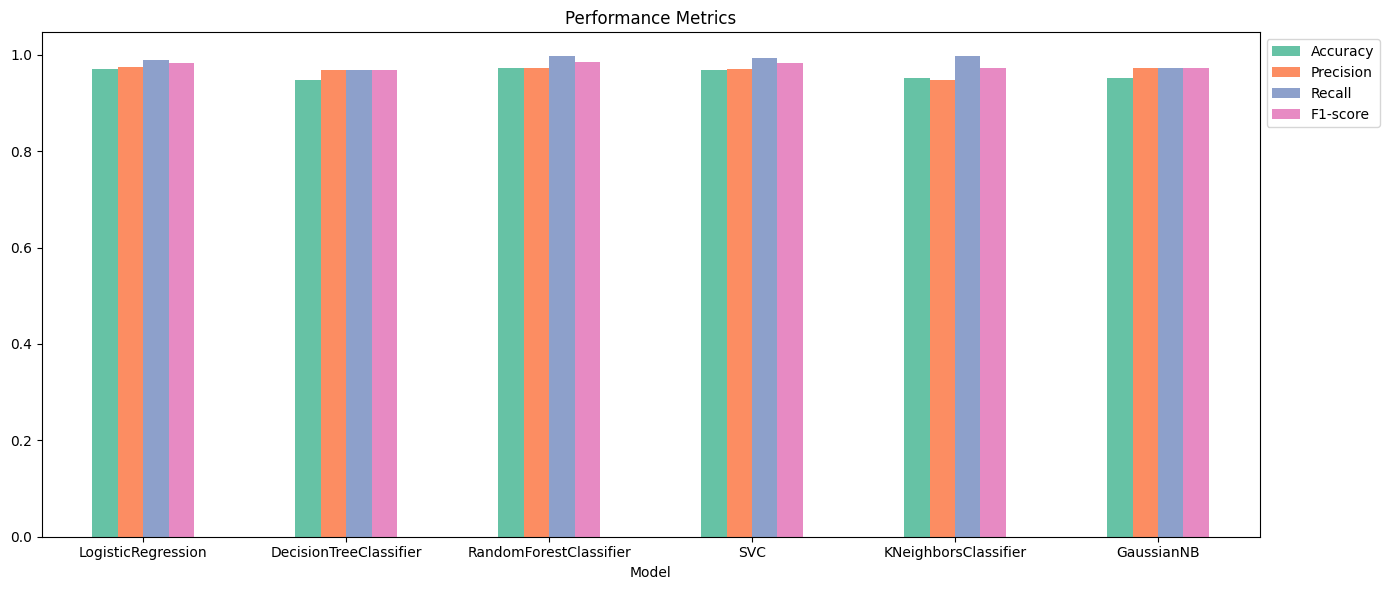

In [27]:
print(result_5)
draw_chart(result_5)

## - Nhóm 6: sinh viên có kq hk5
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4', 'diem_hk5', 'drl_hk5'
```

<ipython-input-28-eb083f0c1971>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


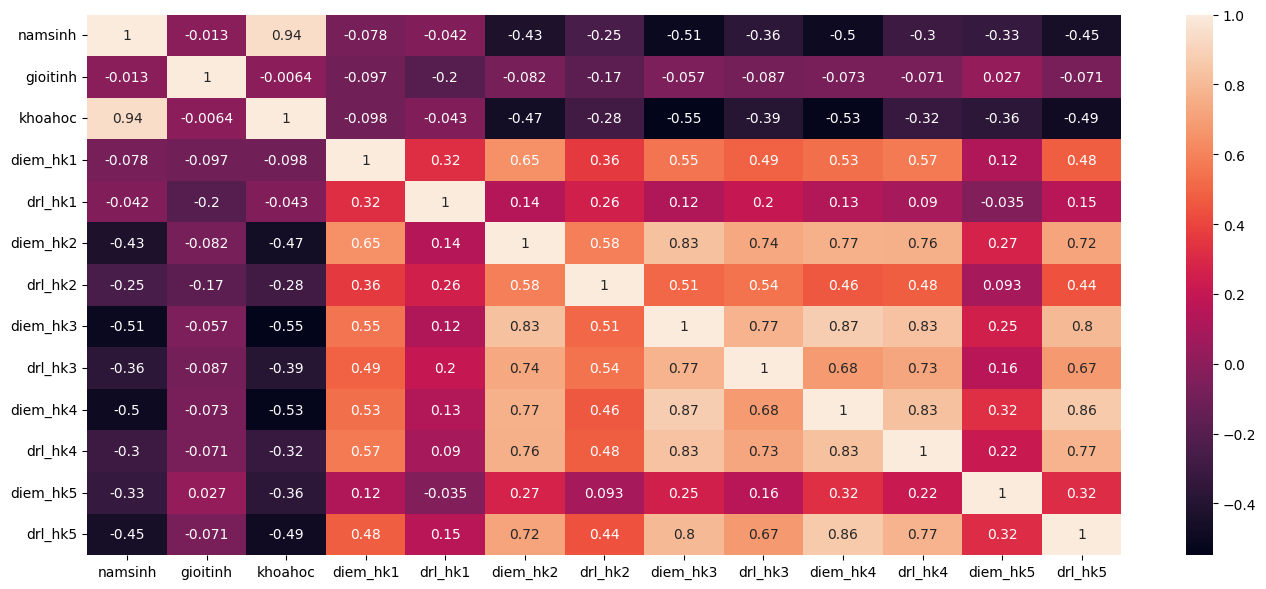

In [28]:
# lấy các cột phù hợp
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4', 'diem_hk5', 'drl_hk5']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [29]:
X_train_6 = X_train[cols]
X_test_6 = X_test[cols]
# encoder
X_train_6, X_test_6 = norm(X_train_6, X_test_6)
# train and test
result_6 = train_and_test(X_train_6, X_test_6, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.97346
├── Precision: 0.97879
├── Recall: 0.99010
└── F1 Score: 0.98441
├── Confusion matrix:
[[ 97  13]
 [  6 600]]
DecisionTreeClassifier
├── Accuracy: 0.96089
├── Precision: 0.97377
├── Recall: 0.98020
└── F1 Score: 0.97697
├── Confusion matrix:
[[ 94  16]
 [ 12 594]]
RandomForestClassifier
├── Accuracy: 0.97346
├── Precision: 0.97415
├── Recall: 0.99505
└── F1 Score: 0.98449
├── Confusion matrix:
[[ 94  16]
 [  3 603]]
SVC
├── Accuracy: 0.97346
├── Precision: 0.97262
├── Recall: 0.99670
└── F1 Score: 0.98452
├── Confusion matrix:
[[ 93  17]
 [  2 604]]
KNeighborsClassifier
├── Accuracy: 0.95391
├── Precision: 0.94976
├── Recall: 0.99835
└── F1 Score: 0.97345
├── Confusion matrix:
[[ 78  32]
 [  1 605]]
GaussianNB
├── Accuracy: 0.96229
├── Precision: 0.97381
├── Recall: 0.98185
└── F1 Score: 0.97781
├── Confusion matrix:
[[ 94  16]
 [ 11 595]]


                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.973464   0.978793  0.990099  0.984413
1  DecisionTreeClassifier  0.960894   0.973770  0.980198  0.976974
2  RandomForestClassifier  0.973464   0.974152  0.995050  0.984490
3                     SVC  0.973464   0.972625  0.996700  0.984515
4    KNeighborsClassifier  0.953911   0.949765  0.998350  0.973451
5              GaussianNB  0.962291   0.973813  0.981848  0.977814


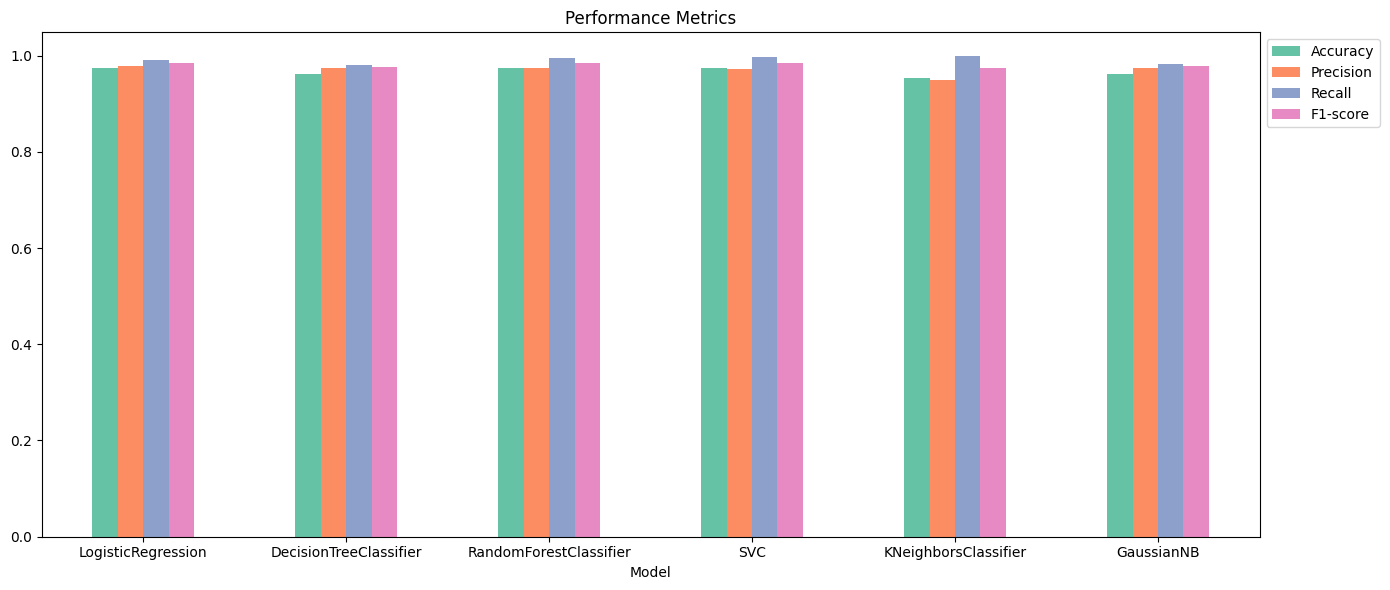

In [30]:
print(result_6)
draw_chart(result_6)

## - Nhóm 7: sinh viên có kq hk6
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4', 'diem_hk5', 
'drl_hk5', 'diem_hk6', 'drl_hk6'
```

<ipython-input-31-75732a19a124>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


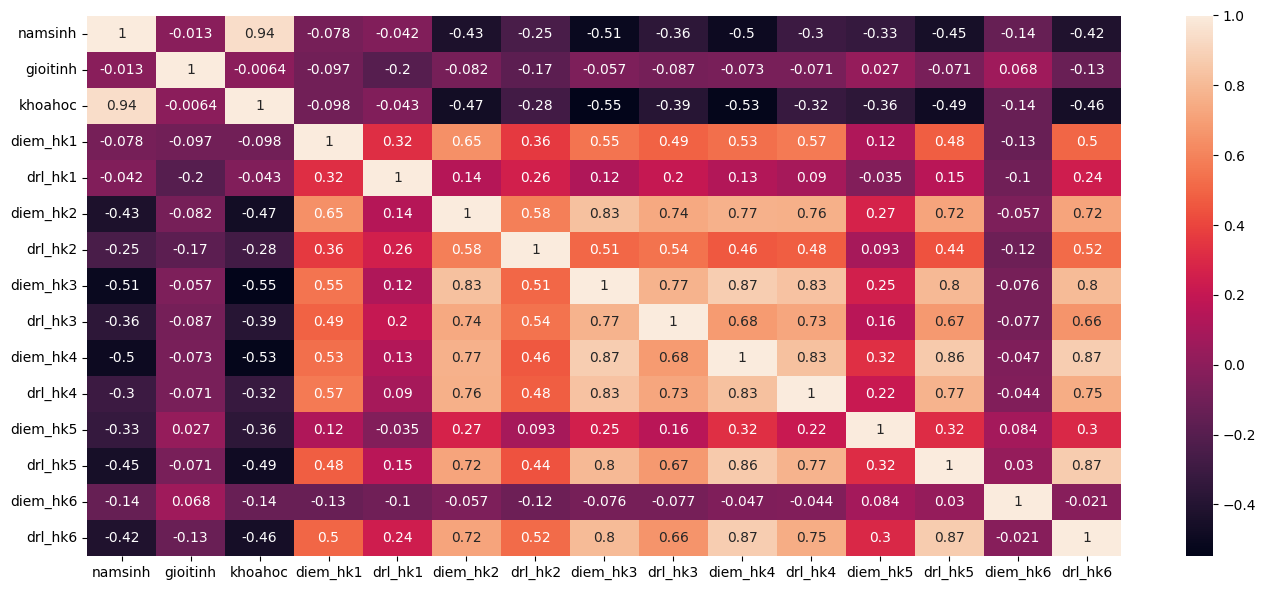

In [31]:
# lấy các cột phù hợp
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4', 'diem_hk5', 
'drl_hk5', 'diem_hk6', 'drl_hk6']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [32]:
X_train_7 = X_train[cols]
X_test_7 = X_test[cols]
# encoder
X_train_7, X_test_7 = norm(X_train_7, X_test_7)
# train and test
result_7 = train_and_test(X_train_7, X_test_7, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.98603
├── Precision: 0.99013
├── Recall: 0.99340
└── F1 Score: 0.99176
├── Confusion matrix:
[[104   6]
 [  4 602]]
DecisionTreeClassifier
├── Accuracy: 0.97486
├── Precision: 0.98515
├── Recall: 0.98515
└── F1 Score: 0.98515
├── Confusion matrix:
[[101   9]
 [  9 597]]
RandomForestClassifier
├── Accuracy: 0.98743
├── Precision: 0.98695
├── Recall: 0.99835
└── F1 Score: 0.99262
├── Confusion matrix:
[[102   8]
 [  1 605]]
SVC
├── Accuracy: 0.98184
├── Precision: 0.98055
├── Recall: 0.99835
└── F1 Score: 0.98937
├── Confusion matrix:
[[ 98  12]
 [  1 605]]
KNeighborsClassifier
├── Accuracy: 0.97207
├── Precision: 0.96805
├── Recall: 1.00000
└── F1 Score: 0.98377
├── Confusion matrix:
[[ 90  20]
 [  0 606]]
GaussianNB
├── Accuracy: 0.97765
├── Precision: 0.98680
├── Recall: 0.98680
└── F1 Score: 0.98680
├── Confusion matrix:
[[102   8]
 [  8 598]]


                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.986034   0.990132  0.993399  0.991763
1  DecisionTreeClassifier  0.974860   0.985149  0.985149  0.985149
2  RandomForestClassifier  0.987430   0.986949  0.998350  0.992617
3                     SVC  0.981844   0.980551  0.998350  0.989370
4    KNeighborsClassifier  0.972067   0.968051  1.000000  0.983766
5              GaussianNB  0.977654   0.986799  0.986799  0.986799


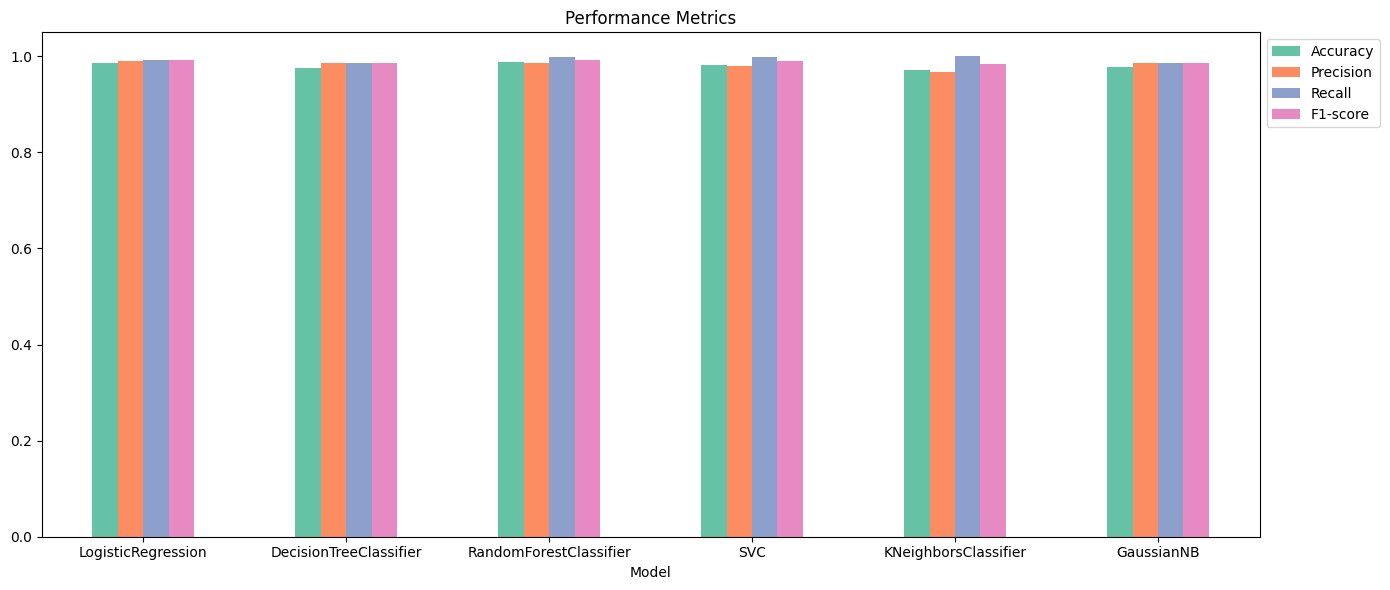

In [33]:
print(result_7)
draw_chart(result_7)

## - Nhóm 8: sinh viên có kq hk7
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4', 'diem_hk5', 
'drl_hk5', 'diem_hk6', 'drl_hk6', 'diem_hk7', 'drl_hk7'
```

<ipython-input-34-e5d481d2cfab>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


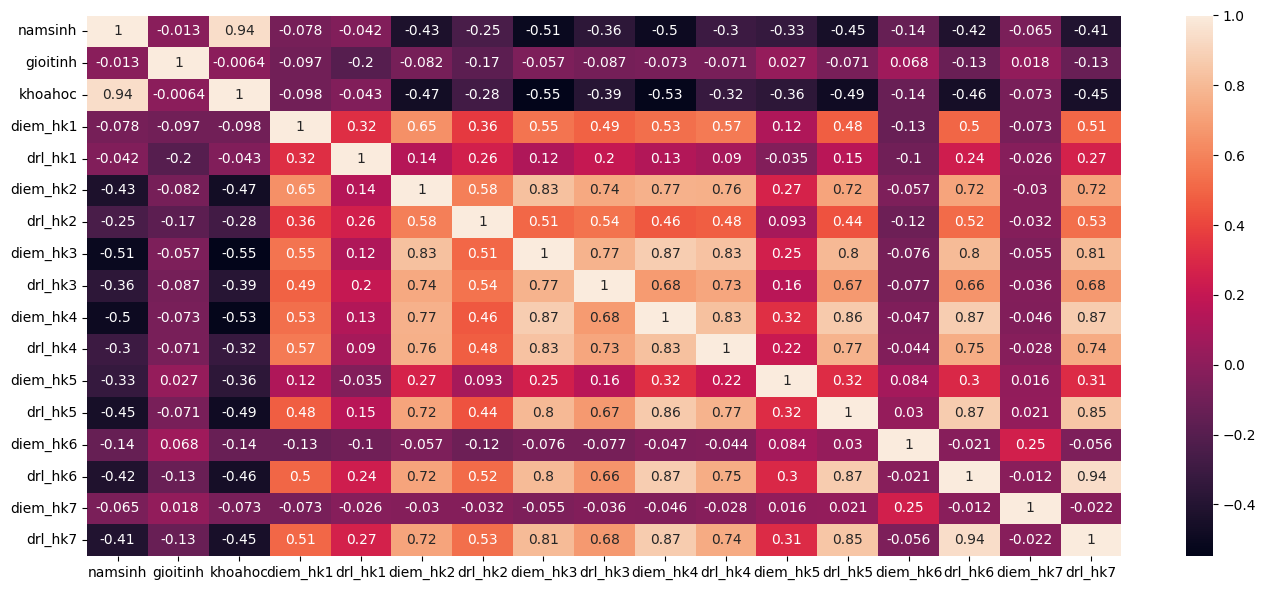

In [34]:
# lấy các cột phù hợp
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4', 'diem_hk5', 
'drl_hk5', 'diem_hk6', 'drl_hk6', 'diem_hk7', 'drl_hk7']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [35]:
X_train_8 = X_train[cols]
X_test_8 = X_test[cols]
# encoder
X_train_8, X_test_8 = norm(X_train_8, X_test_8)
# train and test
result_8 = train_and_test(X_train_8, X_test_8, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]
DecisionTreeClassifier
├── Accuracy: 0.99721
├── Precision: 0.99835
├── Recall: 0.99835
└── F1 Score: 0.99835
├── Confusion matrix:
[[109   1]
 [  1 605]]
RandomForestClassifier
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]
SVC
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]
KNeighborsClassifier
├── Accuracy: 0.99022
├── Precision: 0.98858
├── Recall: 1.00000
└── F1 Score: 0.99426
├── Confusion matrix:
[[103   7]
 [  0 606]]
GaussianNB
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]


                    Model  Accuracy  Precision   Recall  F1-score
0      LogisticRegression  0.998603   0.998353  1.00000  0.999176
1  DecisionTreeClassifier  0.997207   0.998350  0.99835  0.998350
2  RandomForestClassifier  0.998603   0.998353  1.00000  0.999176
3                     SVC  0.998603   0.998353  1.00000  0.999176
4    KNeighborsClassifier  0.990223   0.988581  1.00000  0.994258
5              GaussianNB  0.998603   0.998353  1.00000  0.999176


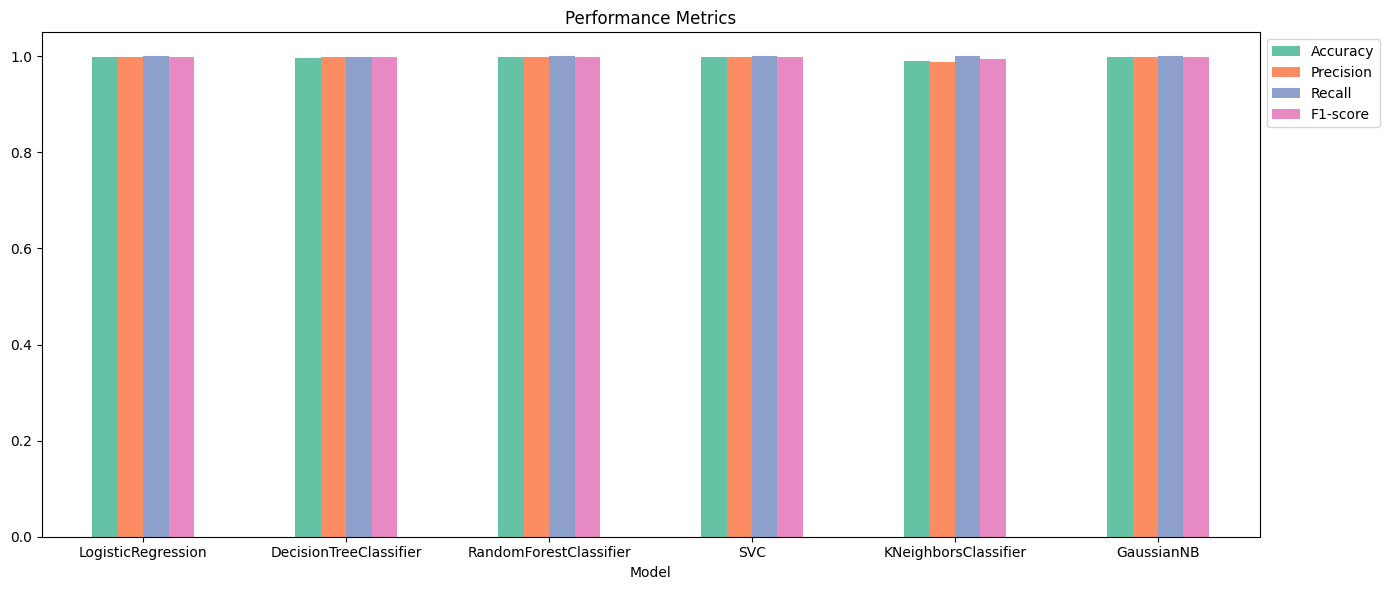

In [36]:
print(result_8)
draw_chart(result_8)

## - Nhóm 9: sinh viên có kq hk8
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4', 'diem_hk5', 
'drl_hk5', 'diem_hk6', 'drl_hk6', 'diem_hk7', 'drl_hk7', 'diem_hk8', 'drl_hk8'
```

<ipython-input-37-ebcc090d247d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X[cols].corr(), annot=True)


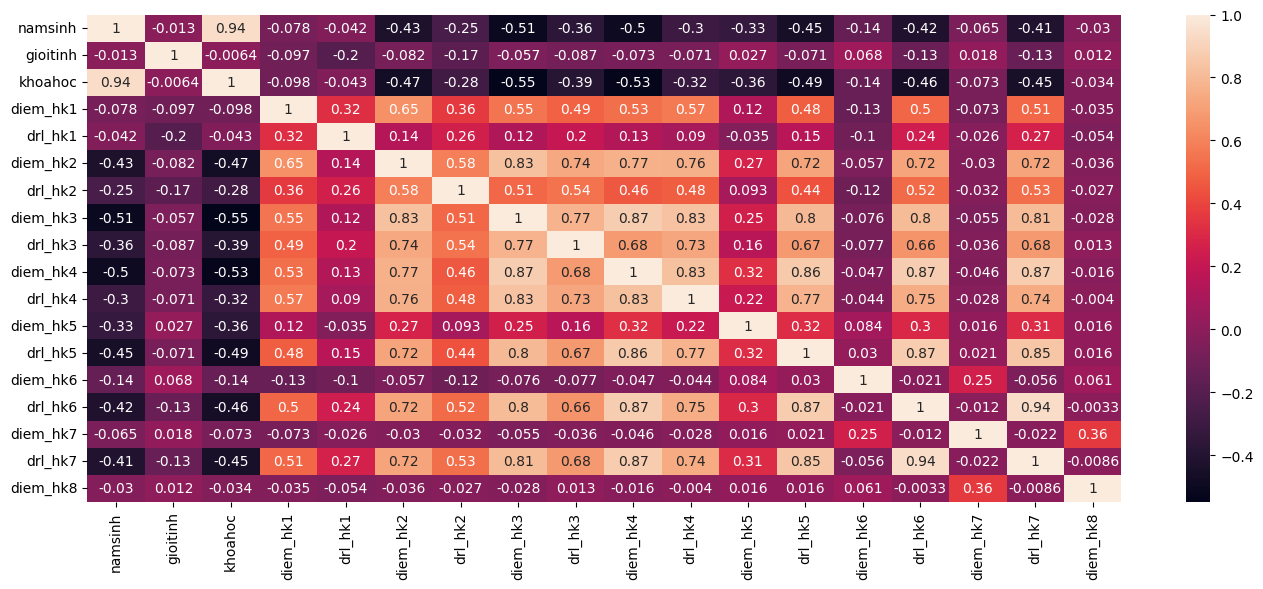

In [37]:
cols = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 
'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'drl_hk1', 'diem_hk2', 
'drl_hk2', 'diem_hk3', 'drl_hk3', 'diem_hk4', 'drl_hk4', 'diem_hk5', 
'drl_hk5', 'diem_hk6', 'drl_hk6', 'diem_hk7', 'drl_hk7', 'diem_hk8']
sn.heatmap(X[cols].corr(), annot=True)
plt.show()

In [38]:
X_train_9 = X_train[cols]
X_test_9 = X_test[cols]
# encoder
X_train_9, X_test_9 = norm(X_train_9, X_test_9)
# train and test
result_9 = train_and_test(X_train_9, X_test_9, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]
DecisionTreeClassifier
├── Accuracy: 0.99721
├── Precision: 0.99835
├── Recall: 0.99835
└── F1 Score: 0.99835
├── Confusion matrix:
[[109   1]
 [  1 605]]
RandomForestClassifier
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]
SVC
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]
KNeighborsClassifier
├── Accuracy: 0.99022
├── Precision: 0.98858
├── Recall: 1.00000
└── F1 Score: 0.99426
├── Confusion matrix:
[[103   7]
 [  0 606]]
GaussianNB
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]


                    Model  Accuracy  Precision   Recall  F1-score
0      LogisticRegression  0.998603   0.998353  1.00000  0.999176
1  DecisionTreeClassifier  0.997207   0.998350  0.99835  0.998350
2  RandomForestClassifier  0.998603   0.998353  1.00000  0.999176
3                     SVC  0.998603   0.998353  1.00000  0.999176
4    KNeighborsClassifier  0.990223   0.988581  1.00000  0.994258
5              GaussianNB  0.998603   0.998353  1.00000  0.999176


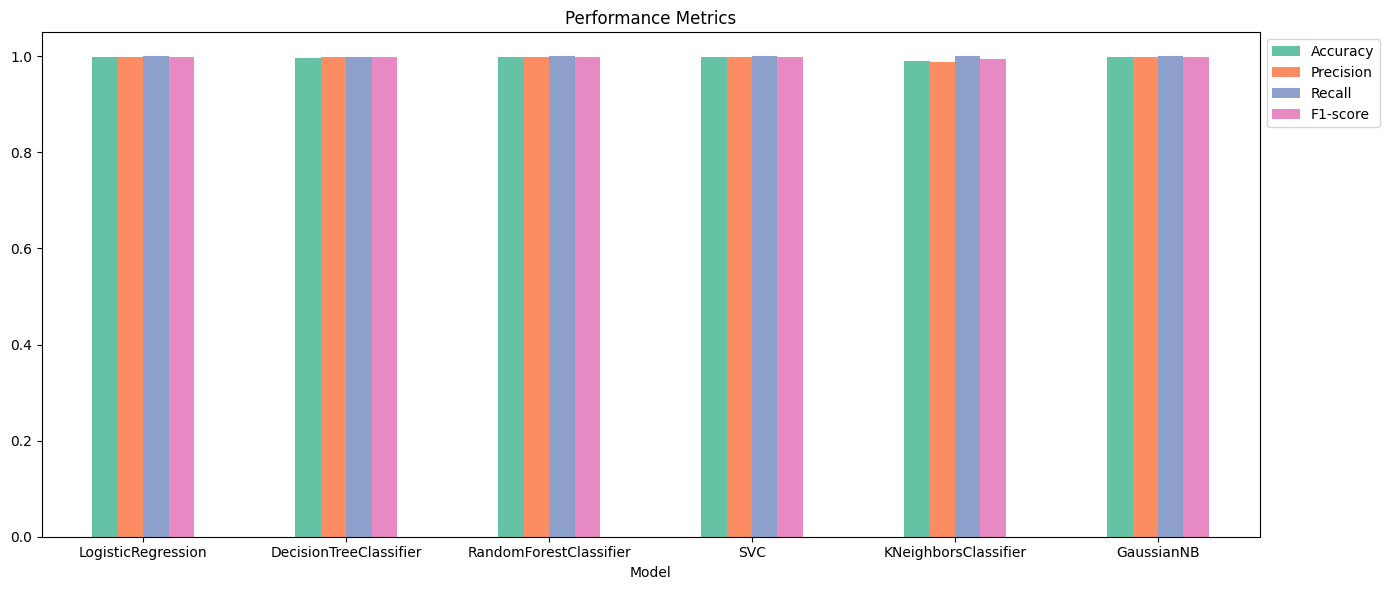

In [39]:
print(result_9)
draw_chart(result_9)

## - Nhóm 10: sinh viên có kq hk8 và 1 số thông tin khác
```
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt',
'khoahoc', 'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'diem_hk2',
'diem_hk3', 'diem_hk4', 'diem_hk5', 'diem_hk6', 'diem_hk7', 'diem_hk8',
'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5', 'drl_hk6',
'drl_hk7', 'dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy'
```

In [40]:
# lấy các cột phù hợp
X_train_10 = X_train
X_test_10 = X_test
# encoder
X_train_10, X_test_10 = norm(X_train_10, X_test_10)
# train and test
result_10 = train_and_test(X_train_10, X_test_10, y_train, y_test, model_list)

LogisticRegression
├── Accuracy: 1.00000
├── Precision: 1.00000
├── Recall: 1.00000
└── F1 Score: 1.00000
├── Confusion matrix:
[[110   0]
 [  0 606]]
DecisionTreeClassifier
├── Accuracy: 1.00000
├── Precision: 1.00000
├── Recall: 1.00000
└── F1 Score: 1.00000
├── Confusion matrix:
[[110   0]
 [  0 606]]
RandomForestClassifier
├── Accuracy: 1.00000
├── Precision: 1.00000
├── Recall: 1.00000
└── F1 Score: 1.00000
├── Confusion matrix:
[[110   0]
 [  0 606]]
SVC
├── Accuracy: 1.00000
├── Precision: 1.00000
├── Recall: 1.00000
└── F1 Score: 1.00000
├── Confusion matrix:
[[110   0]
 [  0 606]]
KNeighborsClassifier
├── Accuracy: 1.00000
├── Precision: 1.00000
├── Recall: 1.00000
└── F1 Score: 1.00000
├── Confusion matrix:
[[110   0]
 [  0 606]]
GaussianNB
├── Accuracy: 0.99860
├── Precision: 0.99835
├── Recall: 1.00000
└── F1 Score: 0.99918
├── Confusion matrix:
[[109   1]
 [  0 606]]


                    Model  Accuracy  Precision  Recall  F1-score
0      LogisticRegression  1.000000   1.000000     1.0  1.000000
1  DecisionTreeClassifier  1.000000   1.000000     1.0  1.000000
2  RandomForestClassifier  1.000000   1.000000     1.0  1.000000
3                     SVC  1.000000   1.000000     1.0  1.000000
4    KNeighborsClassifier  1.000000   1.000000     1.0  1.000000
5              GaussianNB  0.998603   0.998353     1.0  0.999176


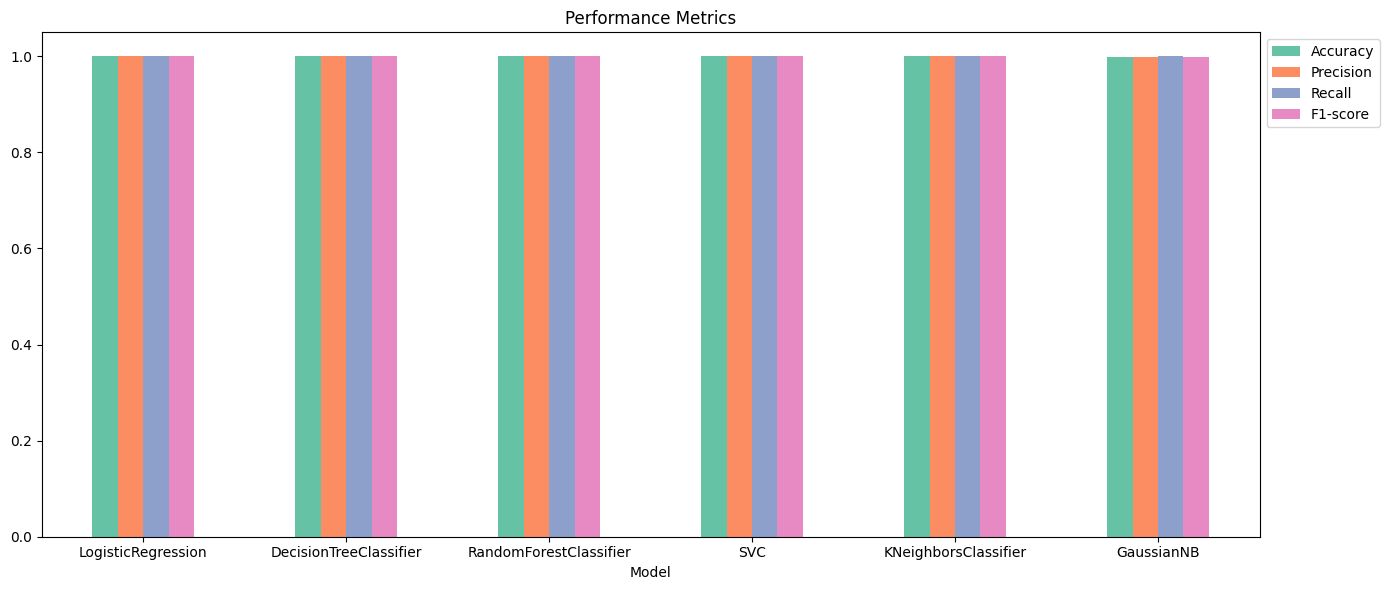

In [41]:
print(result_10)
draw_chart(result_10)

#Data Visualization

## Toàn bộ dữ liệu
'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt',
'khoahoc', 'chuyennganh2', 'dien_tt', 'mamh', 'diem_hk1', 'diem_hk2',
'diem_hk3', 'diem_hk4', 'diem_hk5', 'diem_hk6', 'diem_hk7', 'diem_hk8',
'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5', 'drl_hk6',
'drl_hk7', 'dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy'

In [ ]:
data['noisinh'] = data['noisinh'].replace('TP Hồ Chí Minh','TP.HCM')
data['noisinh'] = data['noisinh'].replace('Tp Hồ Chí Minh','TP.HCM')
data['noisinh'] = data['noisinh'].replace('Thành phố Hồ Chí Minh','TP.HCM')
data['noisinh'] = data['noisinh'].replace('Bê n Tre','Bến Tre')
data['noisinh'] = data['noisinh'].replace('Nghệ an','Nghệ An')
data['noisinh'] = data['noisinh'].replace('Nghê An','Nghệ An')
data['noisinh'] = data['noisinh'].replace('Lâm Đô ng','Lâm Đồng')
data['noisinh'] = data['noisinh'].replace('Bi nh Đi nh','Bình Định')
data['noisinh'] = data['noisinh'].replace('Bi nh Dương','Bình Dương')
data['noisinh'] = data['noisinh'].replace('Thành phố Hà Nội','Hà Nội')
data['noisinh'] = data['noisinh'].replace('Tỉnh Tây Ninh','Tây Ninh')
data['noisinh'] = data['noisinh'].replace('Tỉnh Bình Dương','Bình Dương')
data['noisinh'] = data['noisinh'].replace('Thành phố Đà Nẵng','Đà Nẵng')
data['noisinh'] = data['noisinh'].replace('Tỉnh Đồng Nai','Đồng Nai')
data['noisinh'] = data['noisinh'].replace('Đăk Lăk','Đắk Lắk')
data['noisinh'] = data['noisinh'].replace('Đắc Nông','Đắk Nông')
data['noisinh'] = data['noisinh'].replace('Thành phố Cần Thơ','Cần Thơ')

<ipython-input-68-9d7a4ec242c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.drop(['label','Unnamed: 0'], axis=1).corrwith(data.label).plot(kind='bar', grid=True, figsize=(20, 8)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'namsinh'),
  Text(1, 0, 'gioitinh'),
  Text(2, 0, 'khoahoc'),
  Text(3, 0, 'diem_hk1'),
  Text(4, 0, 'diem_hk2'),
  Text(5, 0, 'diem_hk3'),
  Text(6, 0, 'diem_hk4'),
  Text(7, 0, 'diem_hk5'),
  Text(8, 0, 'diem_hk6'),
  Text(9, 0, 'diem_hk7'),
  Text(10, 0, 'diem_hk8'),
  Text(11, 0, 'drl_hk1'),
  Text(12, 0, 'drl_hk2'),
  Text(13, 0, 'drl_hk3'),
  Text(14, 0, 'drl_hk4'),
  Text(15, 0, 'drl_hk5'),
  Text(16, 0, 'drl_hk6'),
  Text(17, 0, 'drl_hk7'),
  Text(18, 0, 'tongdiem_av'),
  Text(19, 0, 'trangthai_av'),
  Text(20, 0, 'sl_giam'),
  Text(21, 0, 'xlhv'),
  Text(22, 0, 'dtb_toankhoa'),
  Text(23, 0, 'dtb_tichluy'),
  Text(24, 0, 'sotc_tichluy')])

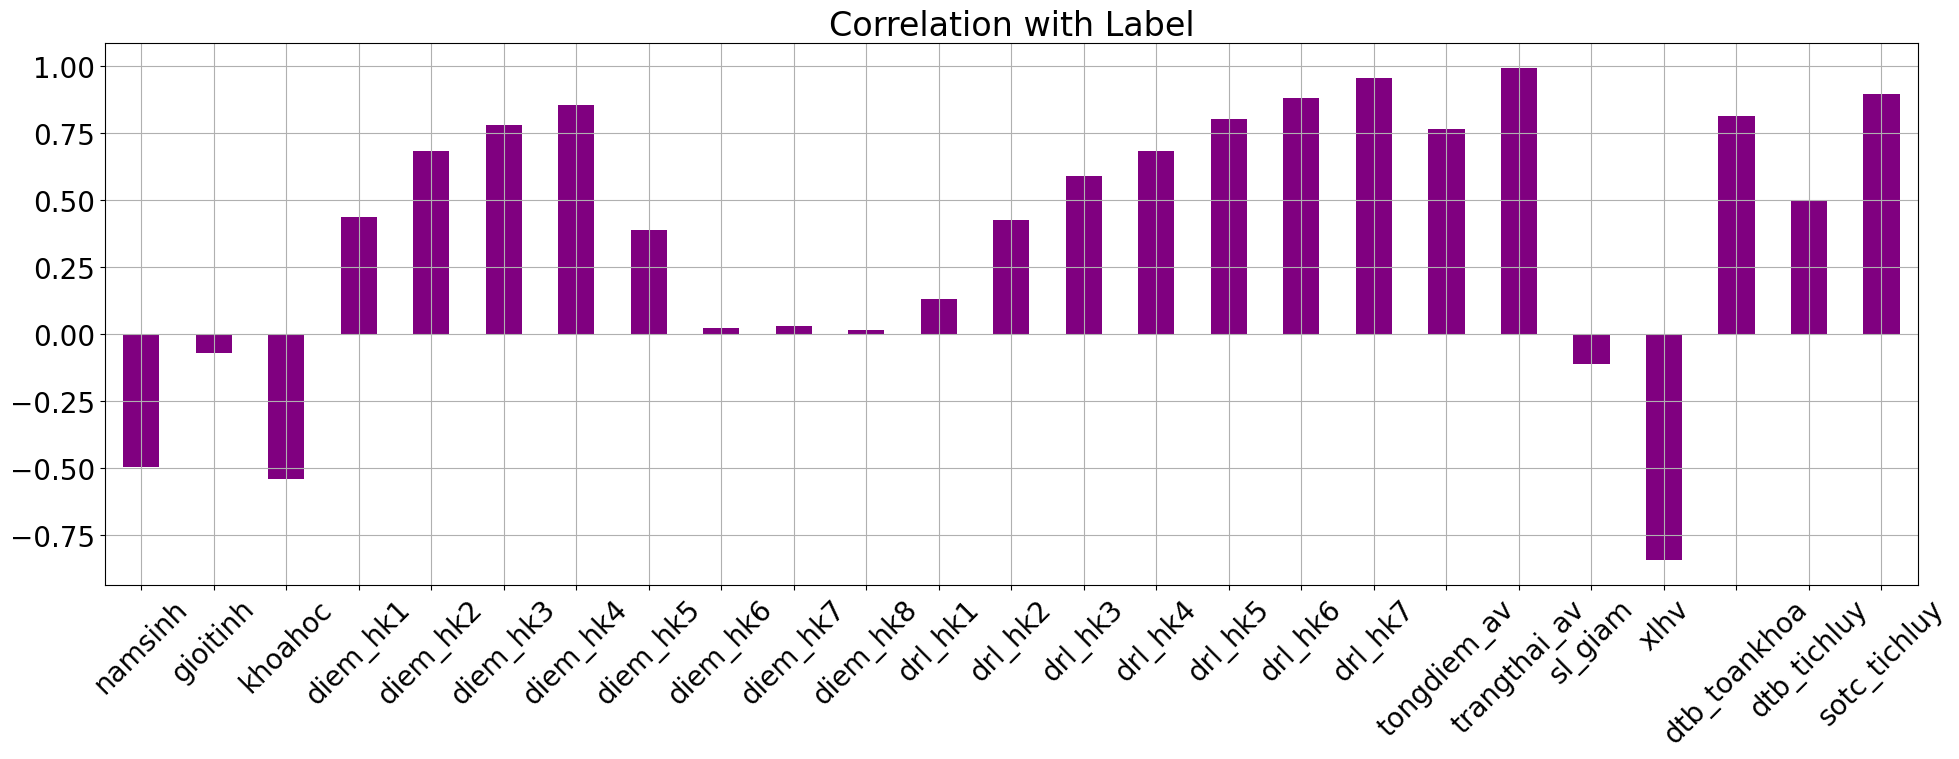

In [ ]:
data.drop(['label','Unnamed: 0'], axis=1).corrwith(data.label).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Label",color="Purple");
plt.rc('font', size=20)  
plt.xticks(rotation=45)

### Cột 'namsinh'


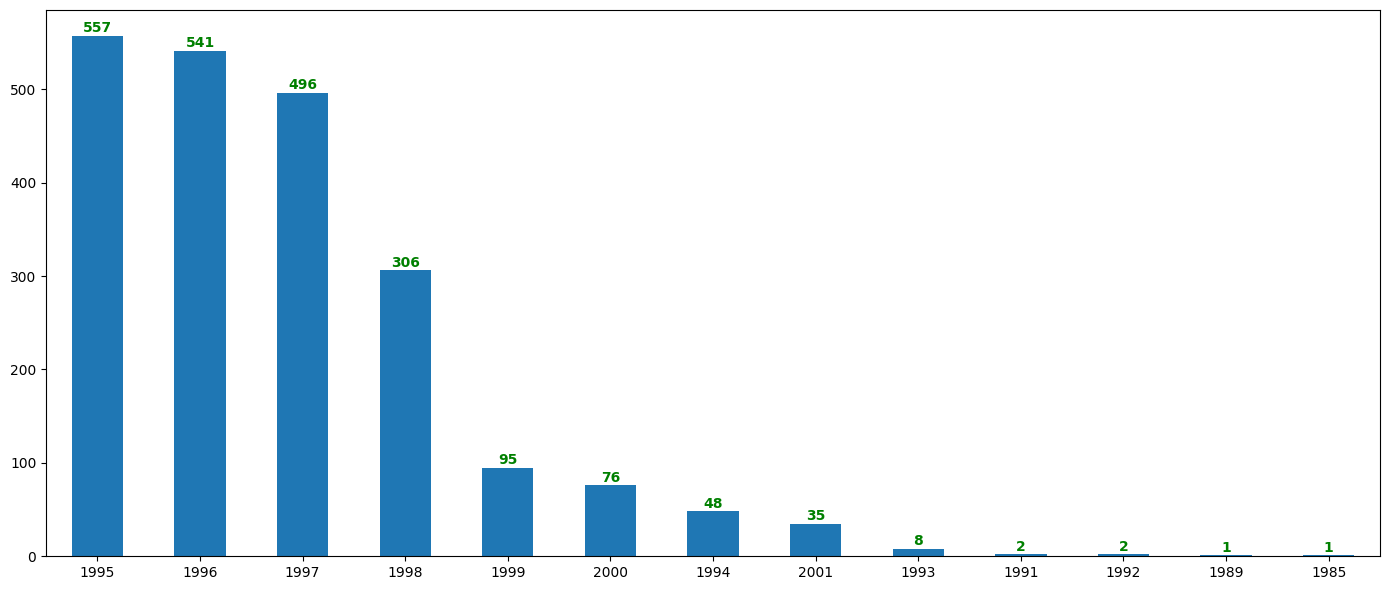

<Figure size 1000x600 with 0 Axes>

In [ ]:
ax = data['namsinh'].value_counts().plot.bar(rot=0)
y_offset = 4
for i, total in enumerate(data['namsinh'].value_counts().values):
    ax.text(i, total + y_offset, round(total), ha='center',
          weight='bold',color ='green')
plt.figure(figsize=(10,6))
plt.show()

### Cột 'gioitinh'


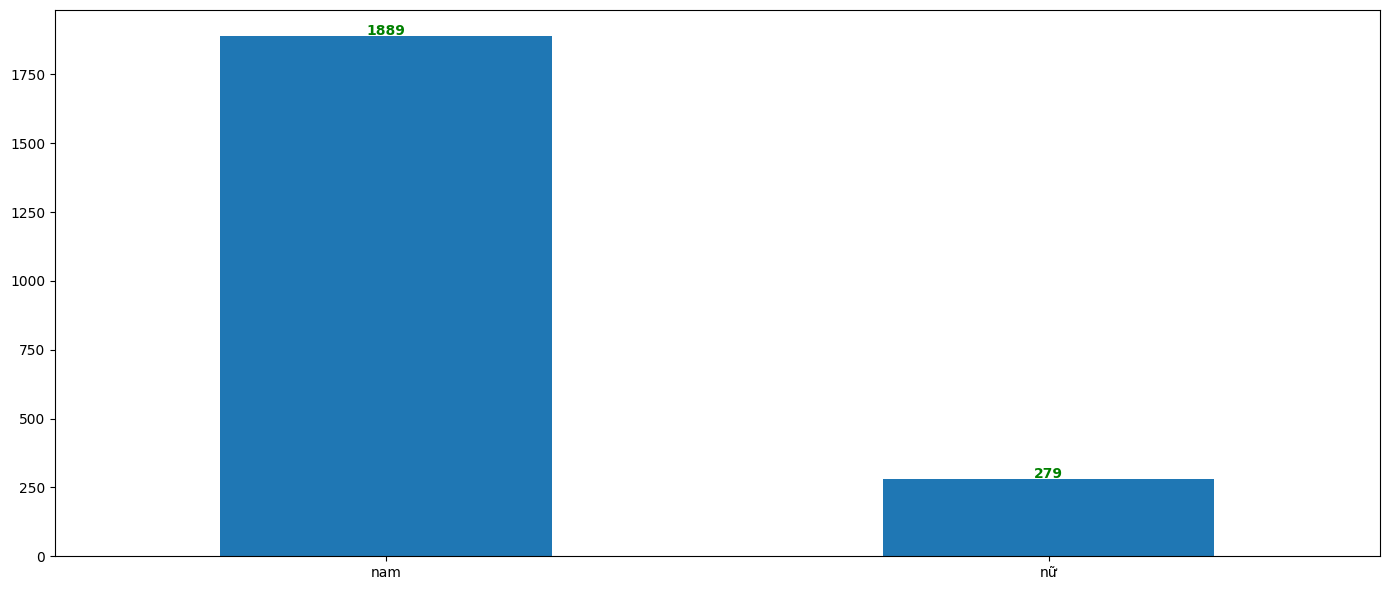

<Figure size 1000x600 with 0 Axes>

In [ ]:
ax = data['gioitinh'].value_counts().plot.bar()
y_offset = 4
for i, total in enumerate(data['gioitinh'].value_counts().values):
    ax.text(i, total + y_offset, round(total), ha='center',
          weight='bold',color ='green')
ax.set_xticklabels(['nam','nữ'],rotation=0)
plt.figure(figsize=(10,6))
plt.show()

### Cột 'noisinh'


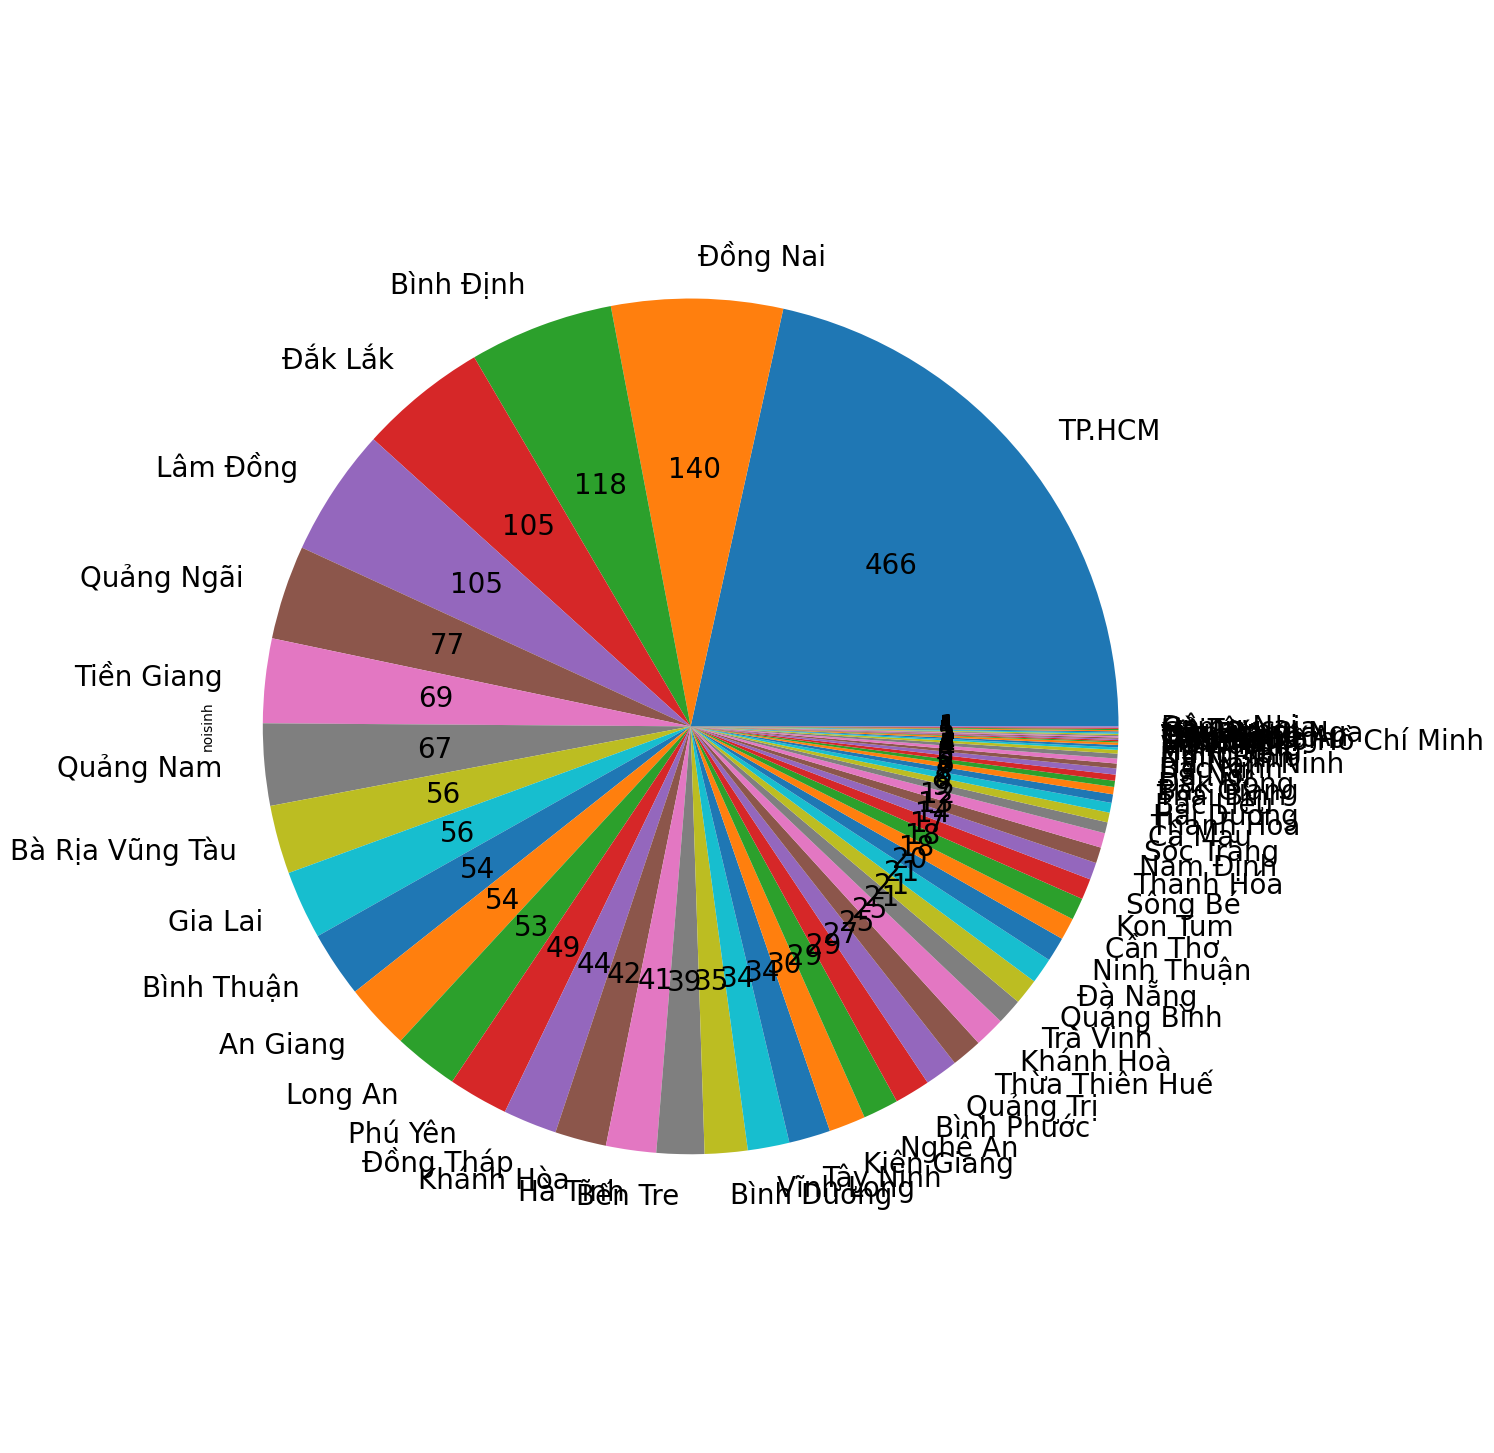

In [ ]:
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
ax = data['noisinh'].value_counts().plot.pie(autopct=lambda x: '{:.0f}'.format(x*np.sum(data['noisinh'].value_counts().values)/100),textprops={'fontsize': 20})
# for i, total in enumerate(data['noisinh'].value_counts().values):
#     ax.text(i, total, round(total), ha='center',
#           weight='bold',color ='green')
# plt.figure(figsize=(10,6))
plt.axis('equal')
plt.show()

### Cột 'lopsh'


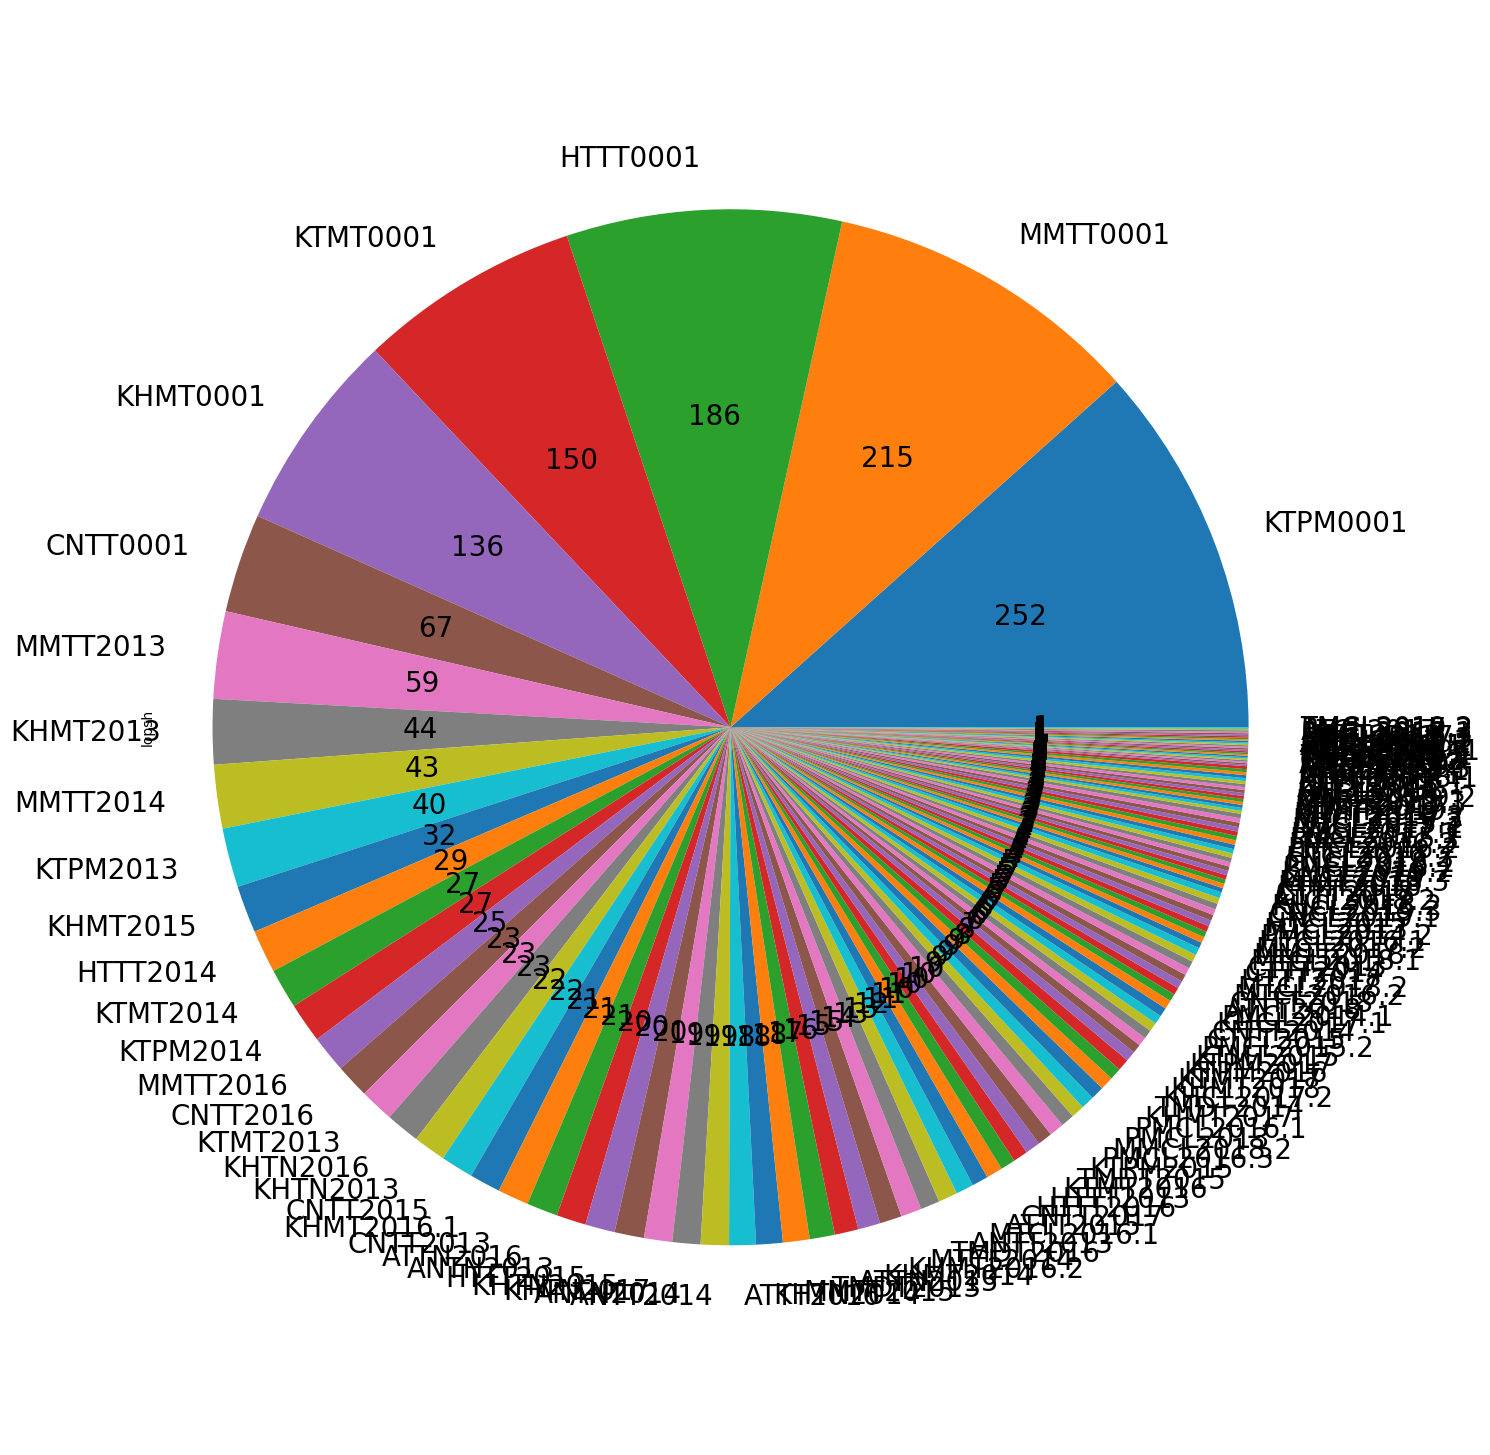

In [ ]:
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
ax = data['lopsh'].value_counts().plot.pie(autopct=lambda x: '{:.0f}'.format(x*np.sum(data['lopsh'].value_counts().values)/100),textprops={'fontsize': 20})
# for i, total in enumerate(data['noisinh'].value_counts().values):
#     ax.text(i, total, round(total), ha='center',
#           weight='bold',color ='green')
# plt.figure(figsize=(10,6))
plt.axis('equal')
plt.show()

### Cột 'khoa'


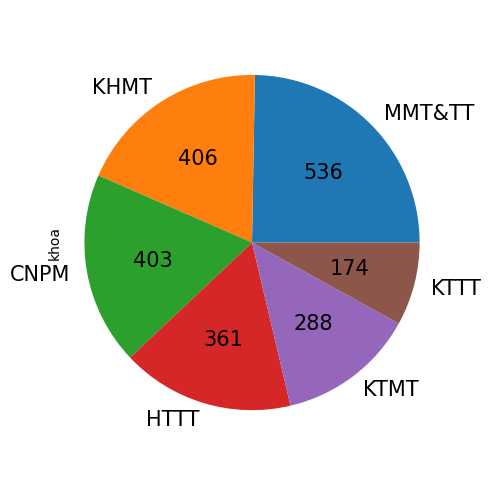

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
ax = data['khoa'].value_counts().plot.pie(autopct=lambda x: '{:.0f}'.format(x*np.sum(data['khoa'].value_counts().values)/100),textprops={'fontsize': 15})
# for i, total in enumerate(data['noisinh'].value_counts().values):
#     ax.text(i, total, round(total), ha='center',
#           weight='bold',color ='green')
# plt.figure(figsize=(10,6))
plt.axis('equal')
plt.show()

### Cột 'hedt'


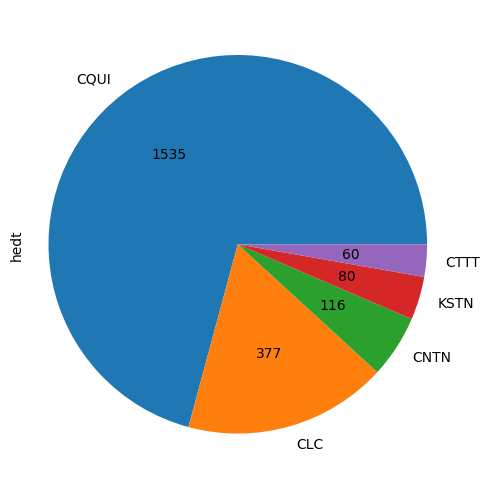

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
ax = data['hedt'].value_counts().plot.pie(autopct=lambda x: '{:.0f}'.format(x*np.sum(data['hedt'].value_counts().values)/100))
# for i, total in enumerate(data['noisinh'].value_counts().values):
#     ax.text(i, total, round(total), ha='center',
#           weight='bold',color ='green')
# plt.figure(figsize=(10,6))
plt.axis('equal')
plt.show()

### Cột 'khoahoc'


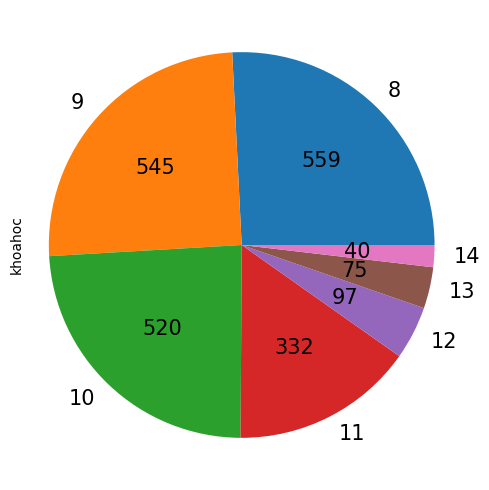

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
ax = data['khoahoc'].value_counts().plot.pie(autopct=lambda x: '{:.0f}'.format(x*np.sum(data['khoahoc'].value_counts().values)/100),textprops={'fontsize': 15})
# for i, total in enumerate(data['noisinh'].value_counts().values):
#     ax.text(i, total, round(total), ha='center',
#           weight='bold',color ='green')
# plt.figure(figsize=(10,6))
plt.axis('equal')
plt.show()

### Cột 'chuyennganh2'


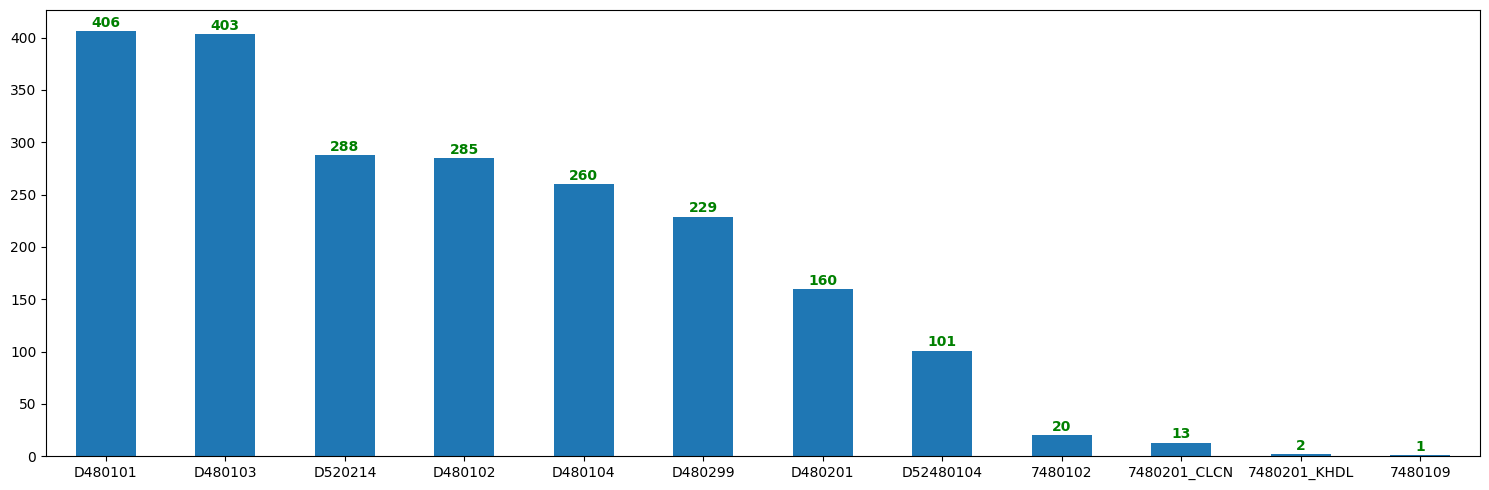

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
ax = data['chuyennganh2'].value_counts().plot.bar(rot=0)

for i, total in enumerate(data['chuyennganh2'].value_counts().values):
    ax.text(i, total+4, round(total), ha='center',
          weight='bold',color ='green')
plt.figure(figsize=(10,6))
# plt.axis('equal')
plt.show()

### Cột 'dien_tt'



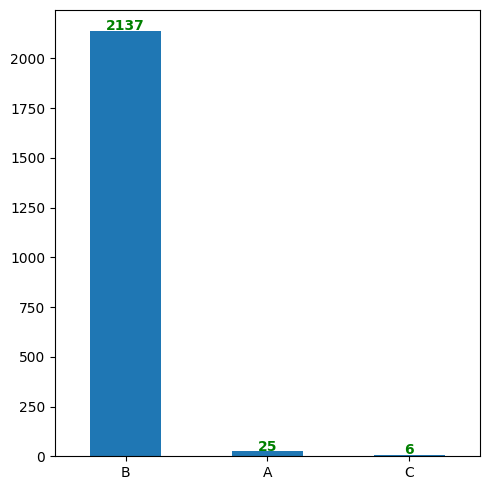

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
ax = data['dien_tt'].value_counts().plot.bar(rot=0)

for i, total in enumerate(data['dien_tt'].value_counts().values):
    ax.text(i, total+4, round(total), ha='center',
          weight='bold',color ='green')
plt.figure(figsize=(10,6))
# plt.axis('equal')
plt.show()

### Cột 'mamh'



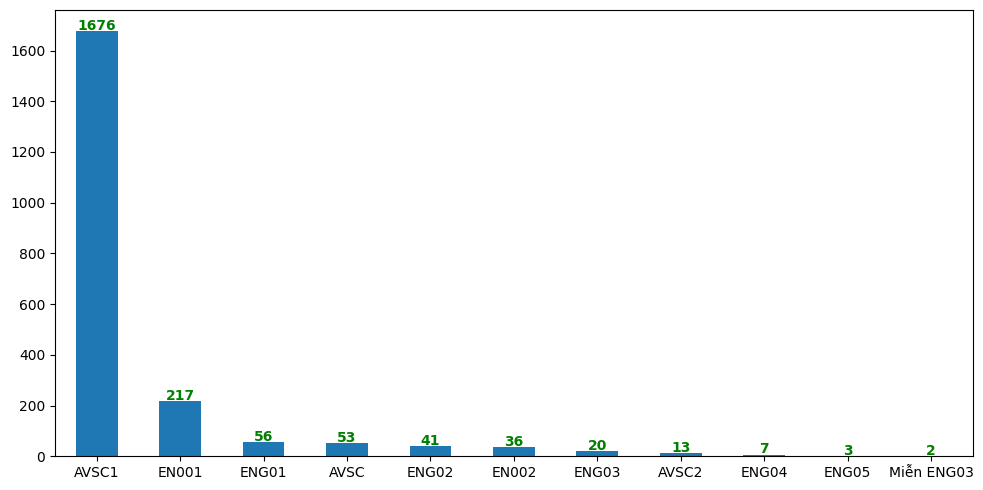

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
ax = data['mamh'].value_counts().plot.bar(rot=0)

for i, total in enumerate(data['mamh'].value_counts().values):
    ax.text(i, total+4, round(total), ha='center',
          weight='bold',color ='green')
plt.figure(figsize=(10,6))
# plt.axis('equal')
plt.show()

### Cột 'diem_hk1', 'diem_hk2', 'diem_hk3', 'diem_hk4', 'diem_hk5', 'diem_hk6', 'diem_hk7', 'diem_hk8',


In [ ]:
df = pd.concat([np.round(data['diem_hk1']).value_counts(), 
                np.round(data['diem_hk2']).value_counts(),
                np.round(data['diem_hk3']).value_counts(),
                np.round(data['diem_hk4']).value_counts(), 
                np.round(data['diem_hk5']).value_counts(),
                np.round(data['diem_hk6']).value_counts(),
                np.round(data['diem_hk7']).value_counts(),
                np.round(data['diem_hk8']).value_counts()], axis=1)
#Drop '-1.0' row 
df = df.drop(-1)
df

,diem_hk1,diem_hk2,diem_hk3,diem_hk4,diem_hk5,diem_hk6,diem_hk7,diem_hk8
7.0,620.0,647.0,625,490,206,21.0,1.0,1.0
8.0,575.0,782.0,752,821,455,26.0,4.0,NaN
6.0,464.0,296.0,263,176,81,19.0,3.0,NaN
9.0,203.0,146.0,168,310,341,7.0,1.0,NaN
5.0,185.0,111.0,102,68,46,13.0,5.0,1.0
4.0,64.0,38.0,43,28,24,5.0,NaN,NaN
3.0,19.0,29.0,30,22,18,5.0,NaN,NaN
2.0,13.0,15.0,8,15,13,6.0,NaN,NaN
0.0,11.0,26.0,24,22,41,45.0,2.0,NaN
1.0,8.0,10.0,21,9,5,4.0,NaN,NaN


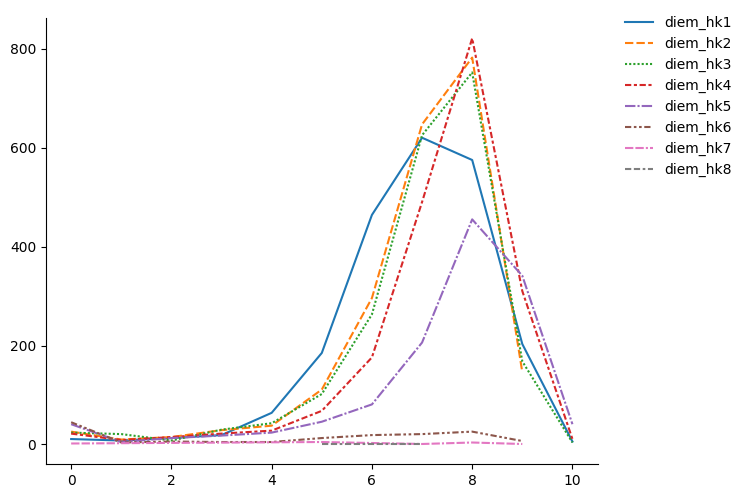

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
# df = np.round(data[["diem_hk1", "diem_hk2", "diem_hk3","diem_hk4","diem_hk5","diem_hk6","diem_hk7","diem_hk8"]])
ax=sns.relplot(data=df, kind="line")

# for i, total in enumerate(data['mamh'].value_counts().values):
#     ax.text(i, total+4, round(total), ha='center',
#           weight='bold',color ='green'
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.axis('equal')
plt.show()

### Cột 'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5', 'drl_hk6', 'drl_hk7'


In [ ]:
df = pd.concat([data['drl_hk1'].value_counts(), 
                data['drl_hk2'].value_counts(),
                data['drl_hk3'].value_counts(),
                data['drl_hk4'].value_counts(), 
                data['drl_hk5'].value_counts(),
                data['drl_hk6'].value_counts(),
                data['drl_hk7'].value_counts()], axis=1)
# df[df.index<0]
df

,drl_hk1,drl_hk2,drl_hk3,drl_hk4,drl_hk5,drl_hk6,drl_hk7
100,143.0,160.0,155.0,171.0,44.0,3.0,2.0
80,94.0,133.0,188.0,210.0,78.0,64.0,67.0
90,91.0,136.0,163.0,150.0,35.0,35.0,35.0
85,82.0,93.0,106.0,108.0,39.0,58.0,60.0
81,72.0,37.0,53.0,68.0,34.0,62.0,66.0
...,...,...,...,...,...,...,...
17,NaN,NaN,1.0,NaN,NaN,NaN,NaN
24,NaN,NaN,1.0,1.0,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
df[df.index>50].sum()

drl_hk1    2138.0
drl_hk2    2032.0
drl_hk3    1984.0
drl_hk4    1956.0
drl_hk5    1853.0
drl_hk6    1756.0
drl_hk7    1806.0
dtype: float64

In [ ]:
sns.set(style="whitegrid")

# df = np.round(data[["diem_hk1", "diem_hk2", "diem_hk3","diem_hk4","diem_hk5","diem_hk6","diem_hk7","diem_hk8"]])
ax = sns.relplot(data=df, kind="line")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# for i, total in enumerate(data['mamh'].value_counts().values):
#     ax.text(i, total+4, round(total), ha='center',
#           weight='bold',color ='green'
# plt.axis('equal')
plt.show()

NameError: ignored

### Cột 'dtb_toankhoa', 'dtb_tichluy'


In [ ]:
df = pd.concat([np.round(data['dtb_toankhoa']).value_counts(), 
                np.round(data['dtb_tichluy']).value_counts(),], axis=1)
# df[df.index<0]
df

In [ ]:
sns.set(style="whitegrid")

# df = np.round(data[["diem_hk1", "diem_hk2", "diem_hk3","diem_hk4","diem_hk5","diem_hk6","diem_hk7","diem_hk8"]])
ax = sns.relplot(data=df, kind="line")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# for i, total in enumerate(data['mamh'].value_counts().values):
#     ax.text(i, total+4, round(total), ha='center',
#           weight='bold',color ='green'
# plt.axis('equal')
plt.show()

### Cột 'sotc_tichluy'


In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
ax = data['sotc_tichluy'].value_counts().plot.pie(autopct=lambda x: '{:.0f}'.format(x*np.sum(data['sotc_tichluy'].value_counts().values)/100),textprops={'fontsize': 15})
# for i, total in enumerate(data['noisinh'].value_counts().values):
#     ax.text(i, total, round(total), ha='center',
#           weight='bold',color ='green')
# plt.figure(figsize=(10,6))
plt.axis('equal')
plt.show()

###Correlation heatmap

In [ ]:
sn.heatmap(data.corr(), annot=True)
plt.show()

## Dữ liệu train test

In [ ]:
X.info()

In [ ]:
# about X
plt.rcParams["figure.figsize"] = [4, 4]
plt.rcParams["figure.autolayout"] = True

tp = ['Train', 'Test']
n = [X_train.shape[0], X_test.shape[0]]
data_traintest = pd.DataFrame({'type': tp, 'num': n})
ax = data_traintest.plot.bar(x = 'type', y = 'num', rot=0, color = '#9900FF')
for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Tập dữ liệu')
plt.ylabel('Số lượng')
plt.title('Biểu đồ tổng số lượng tập dữ liệu')
plt.show()

In [ ]:
label_counts = pd.concat([pd.Series(data['label']).value_counts().reset_index(),
                         pd.Series(y_train).value_counts().reset_index(),
                         pd.Series(y_test).value_counts().reset_index()], axis = 1).T.drop_duplicates().T
label_counts.columns = ['label', 'data', 'y_train', 'y_test']
print(label_counts)
ax = label_counts.plot.bar(x = 'label', y = ['data', 'y_train', 'y_test'], rot=0, color = plt.cm.tab20_r(range(len(label_counts.columns))))
for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng nhãn tập dữ liệu')
plt.show()

## Tính trung bình kết quả của từng nhóm

In [ ]:
dataframes = [result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9,result_10]
sumary = []
for i in dataframes:
  sumary.append(i.mean())
# Tạo DataFrame tổng hợp
summary_df = pd.concat(sumary, axis=1).T
summary_df['Group'] = [i+1 for i in range(10)]
summary_df = summary_df[['Group','Accuracy', 'Precision', 'Recall', 'F1-score']]

# Hiển thị DataFrame tổng hợp
print(summary_df)
draw_chart(summary_df)

## So sánh từng độ đo của từng nhóm dựa trên kết quả trung bình

In [ ]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

ax = summary_df.plot(x = 'Group', y = ['Accuracy','Precision','Recall','F1-score'], rot=0,  marker='o')

plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(summary_df['Group'])
plt.title('Metrics each group')
plt.show()

In [ ]:
# accuracy
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams["figure.autolayout"] = True

ax = summary_df.plot.bar(x = 'Group', y = ['Accuracy'], rot=0, color = 'violet')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color = 'r')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Accuracy-score')
plt.show()

In [ ]:
# Precision
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams["figure.autolayout"] = True

ax = summary_df.plot.bar(x = 'Group', y = ['Precision'], rot=0, color = 'violet')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color = 'r')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Precision-score')
plt.show()

In [ ]:
# Recall
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams["figure.autolayout"] = True

ax = summary_df.plot.bar(x = 'Group', y = ['Recall'], rot=0, color = 'violet')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color = 'r')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Recall-score')
plt.show()

In [ ]:
# F1
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams["figure.autolayout"] = True

ax = summary_df.plot.bar(x = 'Group', y = ['F1-score'], rot=0, color = 'violet')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color = 'r')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('F1-score')
plt.show()

## Tính trung bình các kết quả của 10 nhóm

In [ ]:
# Tạo danh sách DataFrame
dataframes = [result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9,result_10]

# Tính trung bình các giá trị của từng ô
average_df = pd.concat(dataframes).groupby('Model').mean().reset_index()

# Hiển thị DataFrame trung bình
print(average_df)
draw_chart(average_df)

## So sánh từng độ đo của từng model dựa trên kết quả trung bình

In [ ]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

ax = average_df.plot(x = 'Model', y = ['Accuracy','Precision','Recall','F1-score'], rot=0,  marker='o')

plt.legend(bbox_to_anchor=(1, 1))
# plt.xticks(average_df['Model'])
plt.title('Metrics each Model')
plt.show()

In [ ]:
# accuracy
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

ax = average_df.plot.bar(x = 'Model', y = ['Accuracy'], rot=0, color = 'orange')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color = 'r')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Accuracy-score')
plt.show()

In [ ]:
# Precision
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

ax = average_df.plot.bar(x = 'Model', y = ['Precision'], rot=0, color = 'orange')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color = 'r')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Precision-score')
plt.show()

In [ ]:
# Recall
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

ax = average_df.plot.bar(x = 'Model', y = ['Recall'], rot=0, color = 'orange')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color = 'r')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Recall-score')
plt.show()

In [ ]:
# F1-score
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

ax = average_df.plot.bar(x = 'Model', y = ['F1-score'], rot=0, color = 'orange')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color = 'r')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('F1-score')
plt.show()

# Train with model

In [45]:
import pickle
X_train_lst = [X_train_1,X_train_2,X_train_3,X_train_4,X_train_5,X_train_6,X_train_7,X_train_8,X_train_9,X_train_10]
X_test_lst = [X_test_1,X_test_2,X_test_3,X_test_4,X_test_5,X_test_6,X_test_7,X_test_8,X_test_9,X_test_10]


In [47]:
for i in range(10):
  model = model_list[2].fit(X_train_lst[i], y_train) 
  with open(f'random_forest_{i+1}.pkl', 'wb') as file:
    pickle.dump(model, file)

In [46]:
def train_and_test_rd(x_train, y_train):
  model = model_list[2].fit(x_train, y_train) 
  joblib.dump(model, "./random_forest.joblib")
  return eval